# 카드 대금 연체 여부 예측
- 0은 미연체 해당하고 1은 연체 해당

# 환경설정

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 읽기 및 조회
 - `/mnt/elice/dataset/creditcard.csv`을 읽어 df에 저장하세요
 - 상위 5개 샘플(행) 조회

In [2]:
# 코드를 입력해 주세요
df = pd.read_csv("/mnt/elice/dataset/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Time</th>
      <th>V1</th>
      <th>V2</th>
      <th>V3</th>
      <th>V4</th>
      <th>V5</th>
      <th>V6</th>
      <th>V7</th>
      <th>V8</th>
      <th>V9</th>
      <th>...</th>
      <th>V21</th>
      <th>V22</th>
      <th>V23</th>
      <th>V24</th>
      <th>V25</th>
      <th>V26</th>
      <th>V27</th>
      <th>V28</th>
      <th>Amount</th>
      <th>Class</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.0</td>
      <td>-1.359807</td>
      <td>-0.072781</td>
      <td>2.536347</td>
      <td>1.378155</td>
      <td>-0.338321</td>
      <td>0.462388</td>
      <td>0.239599</td>
      <td>0.098698</td>
      <td>0.363787</td>
      <td>...</td>
      <td>-0.018307</td>
      <td>0.277838</td>
      <td>-0.110474</td>
      <td>0.066928</td>
      <td>0.128539</td>
      <td>-0.189115</td>
      <td>0.133558</td>
      <td>-0.021053</td>
      <td>149.62</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.0</td>
      <td>1.191857</td>
      <td>0.266151</td>
      <td>0.166480</td>
      <td>0.448154</td>
      <td>0.060018</td>
      <td>-0.082361</td>
      <td>-0.078803</td>
      <td>0.085102</td>
      <td>-0.255425</td>
      <td>...</td>
      <td>-0.225775</td>
      <td>-0.638672</td>
      <td>0.101288</td>
      <td>-0.339846</td>
      <td>0.167170</td>
      <td>0.125895</td>
      <td>-0.008983</td>
      <td>0.014724</td>
      <td>2.69</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1.0</td>
      <td>-1.358354</td>
      <td>-1.340163</td>
      <td>1.773209</td>
      <td>0.379780</td>
      <td>-0.503198</td>
      <td>1.800499</td>
      <td>0.791461</td>
      <td>0.247676</td>
      <td>-1.514654</td>
      <td>...</td>
      <td>0.247998</td>
      <td>0.771679</td>
      <td>0.909412</td>
      <td>-0.689281</td>
      <td>-0.327642</td>
      <td>-0.139097</td>
      <td>-0.055353</td>
      <td>-0.059752</td>
      <td>378.66</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1.0</td>
      <td>-0.966272</td>
      <td>-0.185226</td>
      <td>1.792993</td>
      <td>-0.863291</td>
      <td>-0.010309</td>
      <td>1.247203</td>
      <td>0.237609</td>
      <td>0.377436</td>
      <td>-1.387024</td>
      <td>...</td>
      <td>-0.108300</td>
      <td>0.005274</td>
      <td>-0.190321</td>
      <td>-1.175575</td>
      <td>0.647376</td>
      <td>-0.221929</td>
      <td>0.062723</td>
      <td>0.061458</td>
      <td>123.50</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2.0</td>
      <td>-1.158233</td>
      <td>0.877737</td>
      <td>1.548718</td>
      <td>0.403034</td>
      <td>-0.407193</td>
      <td>0.095921</td>
      <td>0.592941</td>
      <td>-0.270533</td>
      <td>0.817739</td>
      <td>...</td>
      <td>-0.009431</td>
      <td>0.798278</td>
      <td>-0.137458</td>
      <td>0.141267</td>
      <td>-0.206010</td>
      <td>0.502292</td>
      <td>0.219422</td>
      <td>0.215153</td>
      <td>69.99</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>5 rows × 31 columns</p>
</div>

- 데이터 프레임의 shape을 조회하세요

In [3]:
# 코드를 입력해 주세요
df.shape

(284807, 31)

<p><strong>[출력 결과]</strong></p><pre>(284807, 31)</pre>

- 데이터 프레임의 결측치를 조회하세요

In [5]:
# 코드를 입력해 주세요
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<p><strong>[출력 결과]</strong></p><pre>Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64</pre>

- 데이터 프레임의 정보를 출력하세요

In [6]:
# 코드를 입력해 주세요
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<p><strong>[출력 결과]</strong></p><pre><class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     284807 non-null  float64
 22  V22     284807 non-null  float64
 23  V23     284807 non-null  float64
 24  V24     284807 non-null  float64
 25  V25     284807 non-null  float64
 26  V26     284807 non-null  float64
 27  V27     284807 non-null  float64
 28  V28     284807 non-null  float64
 29  Amount  284807 non-null  float64
 30  Class   284807 non-null  int64  
dtypes: float64(30), int64(1)
memory usage: 67.4 MB
</pre>

- 데이터 프레임의 기초 통계 분석을 진행하세요.
- EDA 과정을 진행합니다.
- 이상치, 최댓값 등을 확인합니다.

In [7]:
# 코드를 입력해 주세요
df.describe()

# 2569 vs 77 로 Amount 컬럼 내에서 차이가 꽤 크다는 것을 볼 수 있음
# 0도 존재. 즉, 이상치들이 존재할 수 있다는 것

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Time</th>
      <th>V1</th>
      <th>V2</th>
      <th>V3</th>
      <th>V4</th>
      <th>V5</th>
      <th>V6</th>
      <th>V7</th>
      <th>V8</th>
      <th>V9</th>
      <th>...</th>
      <th>V21</th>
      <th>V22</th>
      <th>V23</th>
      <th>V24</th>
      <th>V25</th>
      <th>V26</th>
      <th>V27</th>
      <th>V28</th>
      <th>Amount</th>
      <th>Class</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>284807.000000</td>
      <td>2.848070e+05</td>
      <td>2.848070e+05</td>
      <td>2.848070e+05</td>
      <td>2.848070e+05</td>
      <td>2.848070e+05</td>
      <td>2.848070e+05</td>
      <td>2.848070e+05</td>
      <td>2.848070e+05</td>
      <td>2.848070e+05</td>
      <td>...</td>
      <td>2.848070e+05</td>
      <td>2.848070e+05</td>
      <td>2.848070e+05</td>
      <td>2.848070e+05</td>
      <td>2.848070e+05</td>
      <td>2.848070e+05</td>
      <td>2.848070e+05</td>
      <td>2.848070e+05</td>
      <td>284807.000000</td>
      <td>284807.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>94813.859575</td>
      <td>1.168375e-15</td>
      <td>3.416908e-16</td>
      <td>-1.379537e-15</td>
      <td>2.074095e-15</td>
      <td>9.604066e-16</td>
      <td>1.487313e-15</td>
      <td>-5.556467e-16</td>
      <td>1.213481e-16</td>
      <td>-2.406331e-15</td>
      <td>...</td>
      <td>1.654067e-16</td>
      <td>-3.568593e-16</td>
      <td>2.578648e-16</td>
      <td>4.473266e-15</td>
      <td>5.340915e-16</td>
      <td>1.683437e-15</td>
      <td>-3.660091e-16</td>
      <td>-1.227390e-16</td>
      <td>88.349619</td>
      <td>0.001727</td>
    </tr>
    <tr>
      <th>std</th>
      <td>47488.145955</td>
      <td>1.958696e+00</td>
      <td>1.651309e+00</td>
      <td>1.516255e+00</td>
      <td>1.415869e+00</td>
      <td>1.380247e+00</td>
      <td>1.332271e+00</td>
      <td>1.237094e+00</td>
      <td>1.194353e+00</td>
      <td>1.098632e+00</td>
      <td>...</td>
      <td>7.345240e-01</td>
      <td>7.257016e-01</td>
      <td>6.244603e-01</td>
      <td>6.056471e-01</td>
      <td>5.212781e-01</td>
      <td>4.822270e-01</td>
      <td>4.036325e-01</td>
      <td>3.300833e-01</td>
      <td>250.120109</td>
      <td>0.041527</td>
    </tr>
    <tr>
      <th>min</th>
      <td>0.000000</td>
      <td>-5.640751e+01</td>
      <td>-7.271573e+01</td>
      <td>-4.832559e+01</td>
      <td>-5.683171e+00</td>
      <td>-1.137433e+02</td>
      <td>-2.616051e+01</td>
      <td>-4.355724e+01</td>
      <td>-7.321672e+01</td>
      <td>-1.343407e+01</td>
      <td>...</td>
      <td>-3.483038e+01</td>
      <td>-1.093314e+01</td>
      <td>-4.480774e+01</td>
      <td>-2.836627e+00</td>
      <td>-1.029540e+01</td>
      <td>-2.604551e+00</td>
      <td>-2.256568e+01</td>
      <td>-1.543008e+01</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>54201.500000</td>
      <td>-9.203734e-01</td>
      <td>-5.985499e-01</td>
      <td>-8.903648e-01</td>
      <td>-8.486401e-01</td>
      <td>-6.915971e-01</td>
      <td>-7.682956e-01</td>
      <td>-5.540759e-01</td>
      <td>-2.086297e-01</td>
      <td>-6.430976e-01</td>
      <td>...</td>
      <td>-2.283949e-01</td>
      <td>-5.423504e-01</td>
      <td>-1.618463e-01</td>
      <td>-3.545861e-01</td>
      <td>-3.171451e-01</td>
      <td>-3.269839e-01</td>
      <td>-7.083953e-02</td>
      <td>-5.295979e-02</td>
      <td>5.600000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>84692.000000</td>
      <td>1.810880e-02</td>
      <td>6.548556e-02</td>
      <td>1.798463e-01</td>
      <td>-1.984653e-02</td>
      <td>-5.433583e-02</td>
      <td>-2.741871e-01</td>
      <td>4.010308e-02</td>
      <td>2.235804e-02</td>
      <td>-5.142873e-02</td>
      <td>...</td>
      <td>-2.945017e-02</td>
      <td>6.781943e-03</td>
      <td>-1.119293e-02</td>
      <td>4.097606e-02</td>
      <td>1.659350e-02</td>
      <td>-5.213911e-02</td>
      <td>1.342146e-03</td>
      <td>1.124383e-02</td>
      <td>22.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>139320.500000</td>
      <td>1.315642e+00</td>
      <td>8.037239e-01</td>
      <td>1.027196e+00</td>
      <td>7.433413e-01</td>
      <td>6.119264e-01</td>
      <td>3.985649e-01</td>
      <td>5.704361e-01</td>
      <td>3.273459e-01</td>
      <td>5.971390e-01</td>
      <td>...</td>
      <td>1.863772e-01</td>
      <td>5.285536e-01</td>
      <td>1.476421e-01</td>
      <td>4.395266e-01</td>
      <td>3.507156e-01</td>
      <td>2.409522e-01</td>
      <td>9.104512e-02</td>
      <td>7.827995e-02</td>
      <td>77.165000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>172792.000000</td>
      <td>2.454930e+00</td>
      <td>2.205773e+01</td>
      <td>9.382558e+00</td>
      <td>1.687534e+01</td>
      <td>3.480167e+01</td>
      <td>7.330163e+01</td>
      <td>1.205895e+02</td>
      <td>2.000721e+01</td>
      <td>1.559499e+01</td>
      <td>...</td>
      <td>2.720284e+01</td>
      <td>1.050309e+01</td>
      <td>2.252841e+01</td>
      <td>4.584549e+00</td>
      <td>7.519589e+00</td>
      <td>3.517346e+00</td>
      <td>3.161220e+01</td>
      <td>3.384781e+01</td>
      <td>25691.160000</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>
<p>8 rows × 31 columns</p>
</div>

- var() 함수를 이용하여 데이터 프레임의 컬럼별 분산값을 조회하세요

In [8]:
# 코드를 입력해 주세요
df.var()

# 분산이 0이면 제거하자 -> 0인게 없으니 pass
# 대신 Class 컬럼이 0에 가까우니 확인해보자

Time      2.255124e+09
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V5        1.905081e+00
V6        1.774946e+00
V7        1.530401e+00
V8        1.426479e+00
V9        1.206992e+00
V10       1.185594e+00
V11       1.041855e+00
V12       9.984034e-01
V13       9.905708e-01
V14       9.189055e-01
V15       8.378034e-01
V16       7.678191e-01
V17       7.213734e-01
V18       7.025394e-01
V19       6.626619e-01
V20       5.943254e-01
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Amount    6.256007e+04
Class     1.724507e-03
dtype: float64

<p><strong>[출력 결과]</strong></p><pre>Time      2.255124e+09
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V5        1.905081e+00
V6        1.774946e+00
V7        1.530401e+00
V8        1.426479e+00
V9        1.206992e+00
V10       1.185594e+00
V11       1.041855e+00
V12       9.984034e-01
V13       9.905708e-01
V14       9.189055e-01
V15       8.378034e-01
V16       7.678191e-01
V17       7.213734e-01
V18       7.025394e-01
V19       6.626619e-01
V20       5.943254e-01
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Amount    6.256007e+04
Class     1.724507e-03
dtype: float64</pre>

- Class 컬럼의 값별 개수를 계산하세요.

In [9]:
# 코드를 입력해 주세요
df['Class'].value_counts()

# 0은 미연체 거래. 미연체 거래가 상당히 많다.

0    284315
1       492
Name: Class, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>0    284315
1       492
Name: Class, dtype: int64</pre>

- Class 컬럼의 값별 비율을 계산하세요.

In [10]:
# 코드를 입력해 주세요
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

<p><strong>[출력 결과]</strong></p><pre>0    0.998273
1    0.001727
Name: Class, dtype: float64</pre>

- 해당 결과를 시각화하세요.

<AxesSubplot: >

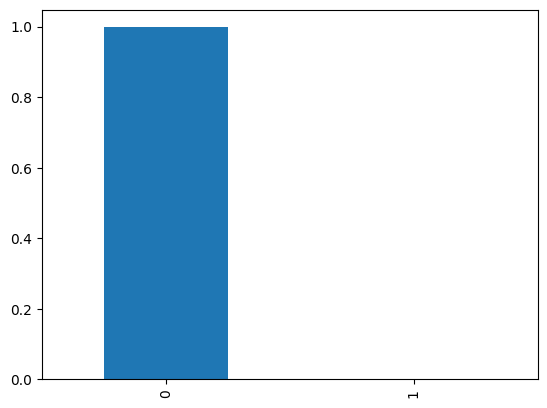

In [11]:
# 코드를 입력해 주세요
df['Class'].value_counts(normalize=True).plot(kind='bar')

<p><strong>[출력 결과]</strong></p><pre><AxesSubplot:></pre>

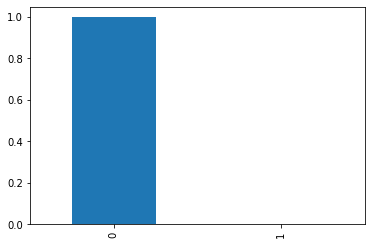

- 데이터 프레임의 컬럼별 분포를 확인하세요
    - hist(figsize=(15, 15), bins=20) 함수를 사용하세요.

<p><strong>[출력 결과]</strong></p><pre><Figure size 432x288 with 1 Axes></pre>

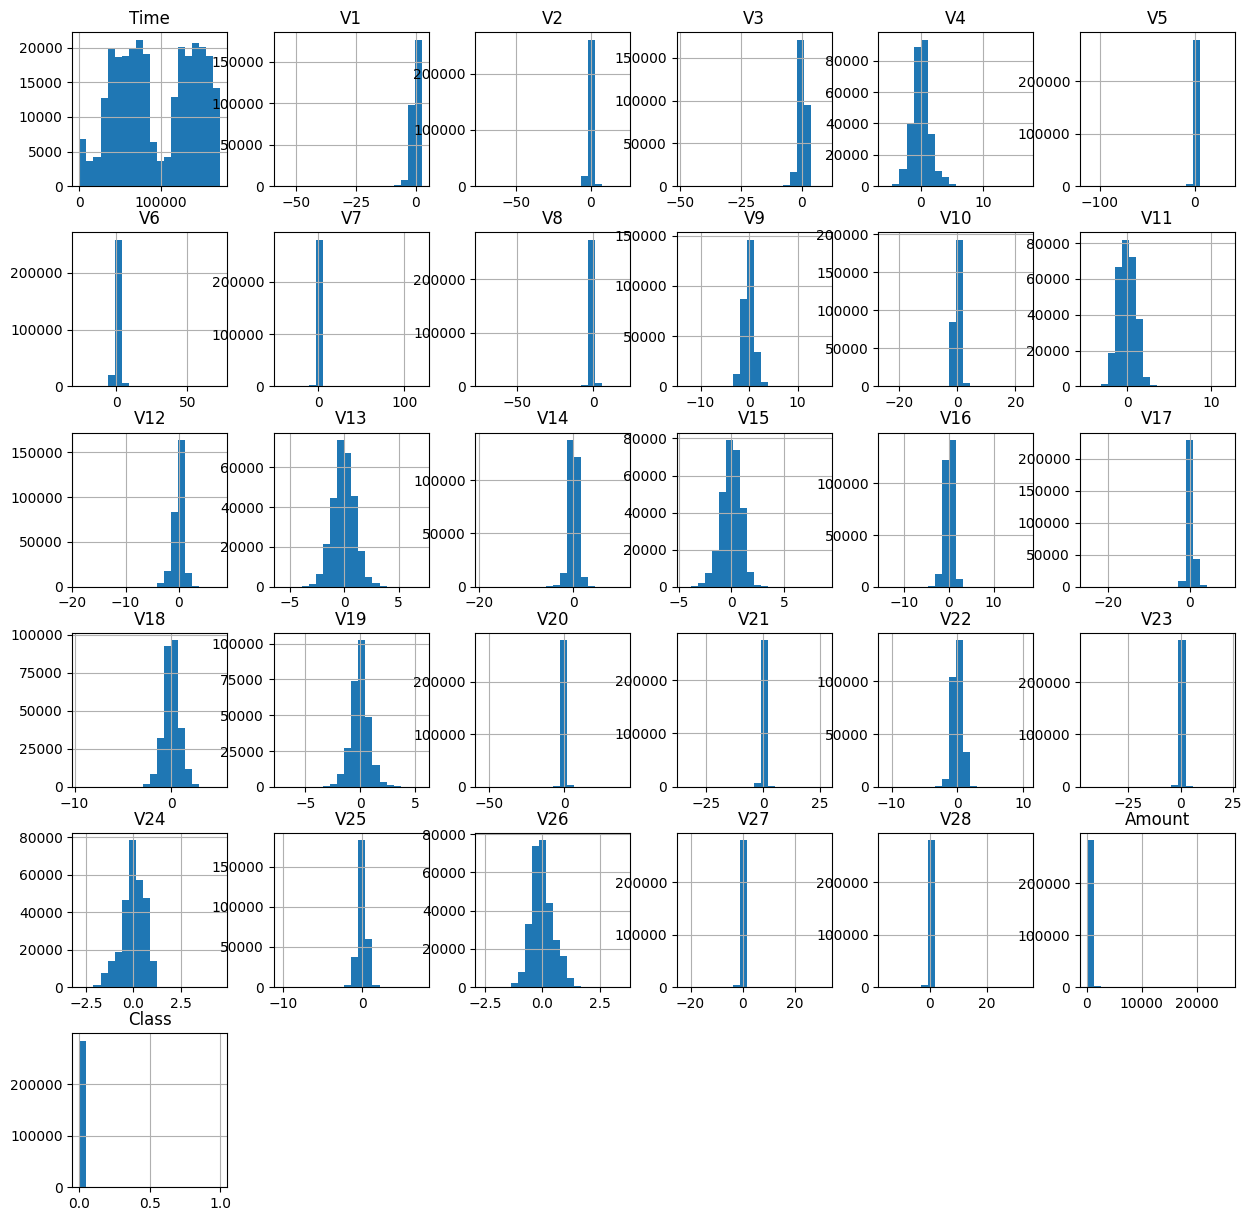

In [18]:
# 코드를 입력해 주세요
df.hist(figsize=(15, 15), bins=20)
plt.show()

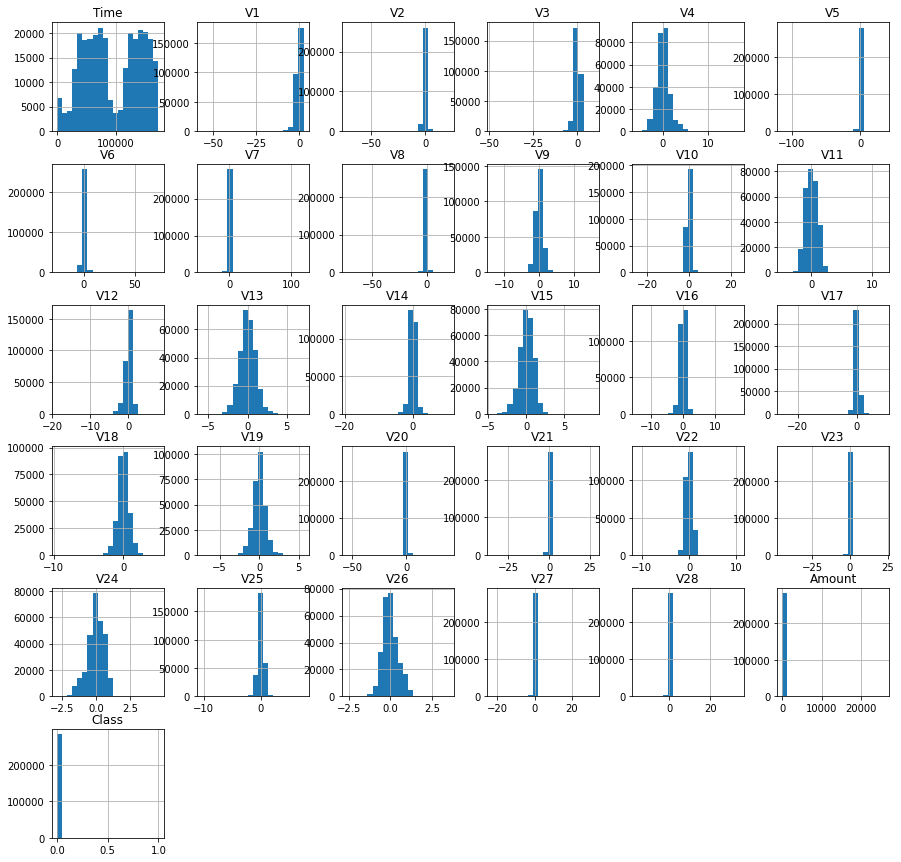

- 정상 데이터(Class 0)만 추출 후 컬럼별 분포를 확인하세요
    - hist(figsize=(15, 15), bins=20) 함수를 사용하세요.

<p><strong>[출력 결과]</strong></p><pre><Figure size 1080x1080 with 36 Axes></pre>

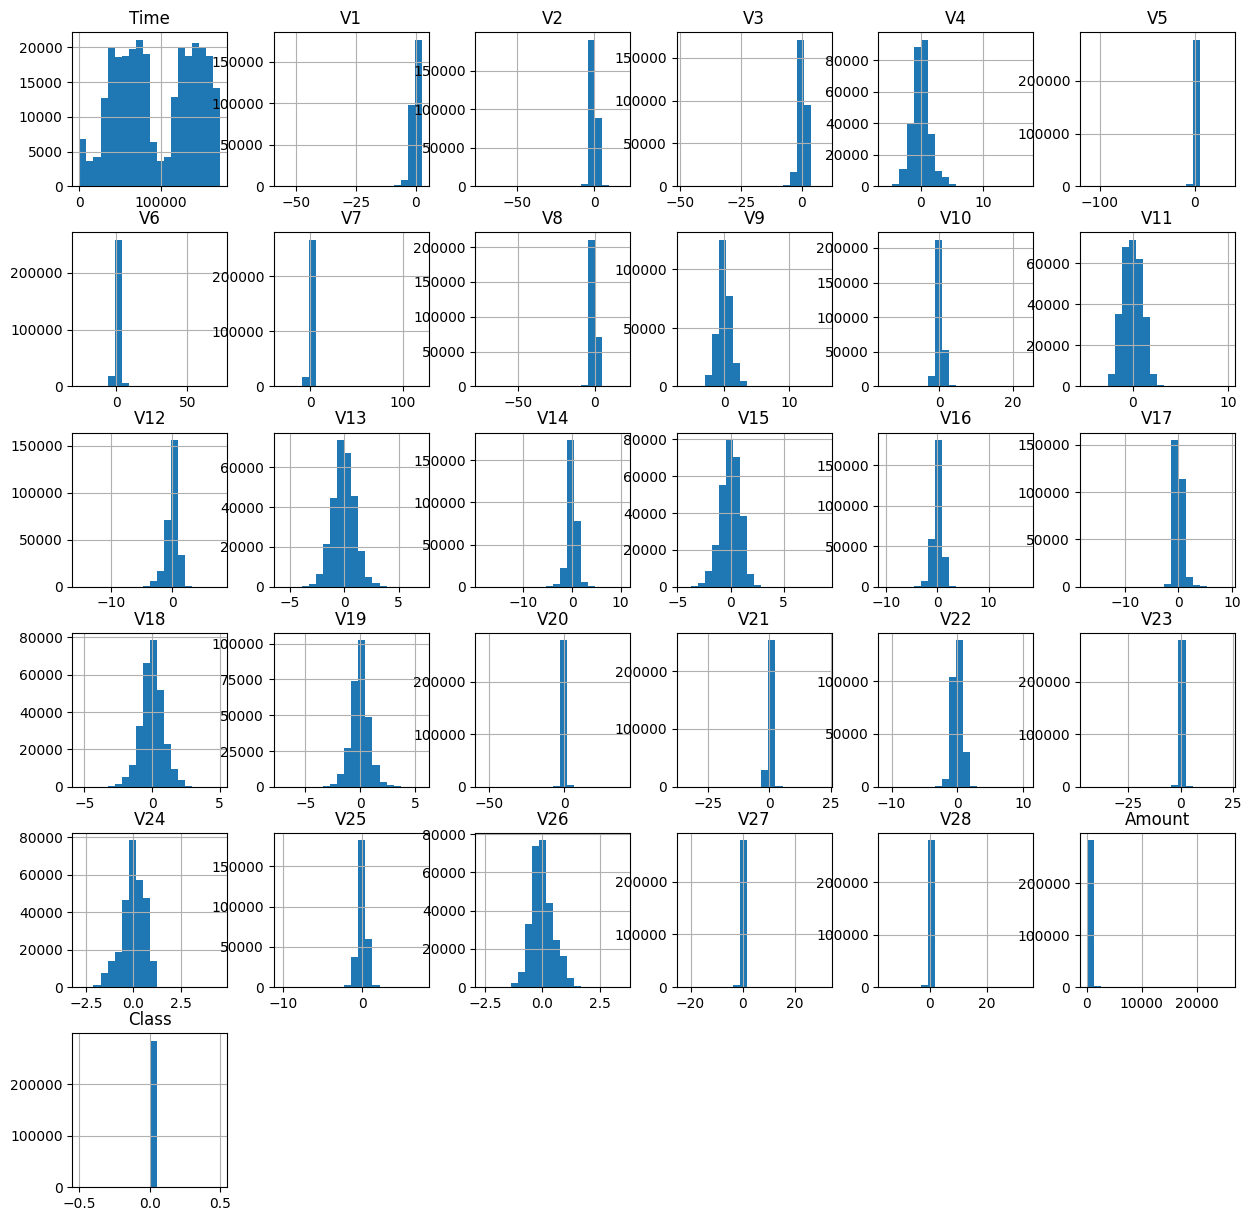

In [19]:
# 코드를 입력해 주세요
df[df['Class'] == 0].hist(figsize=(15, 15), bins=20)
plt.show()

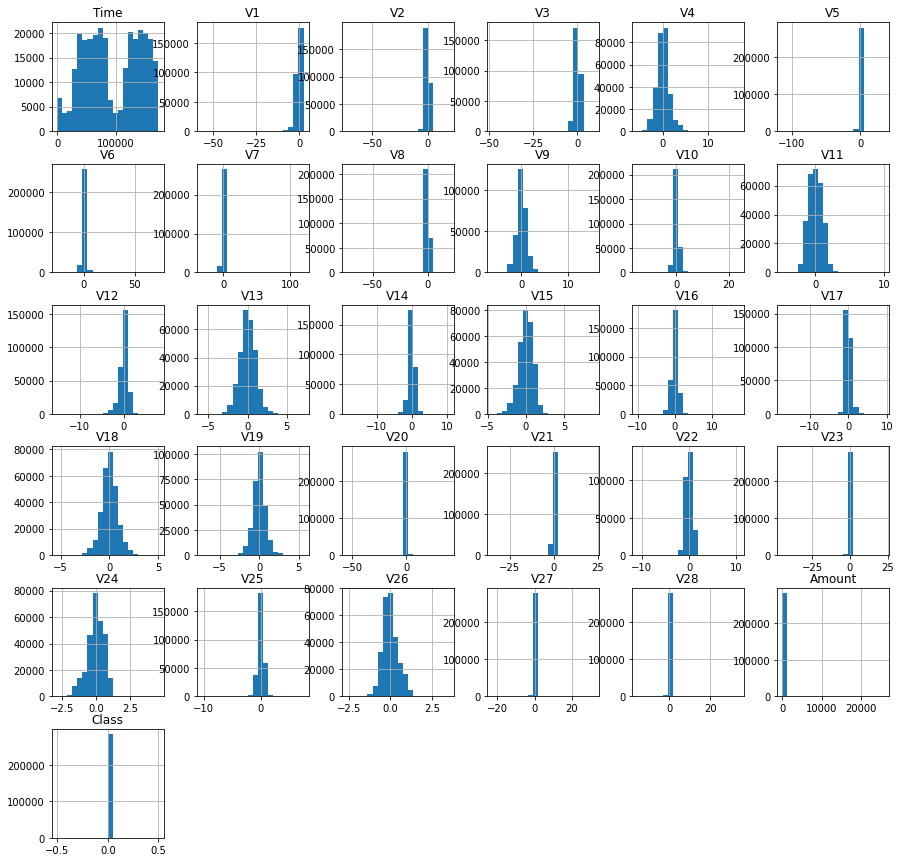

- 비정상 데이터(Class 1)만 추출 후 컬럼별 분포를 확인하세요
    - hist(figsize=(15, 15), bins=20) 함수를 사용하세요.

<p><strong>[출력 결과]</strong></p><pre><Figure size 1080x1080 with 36 Axes></pre>

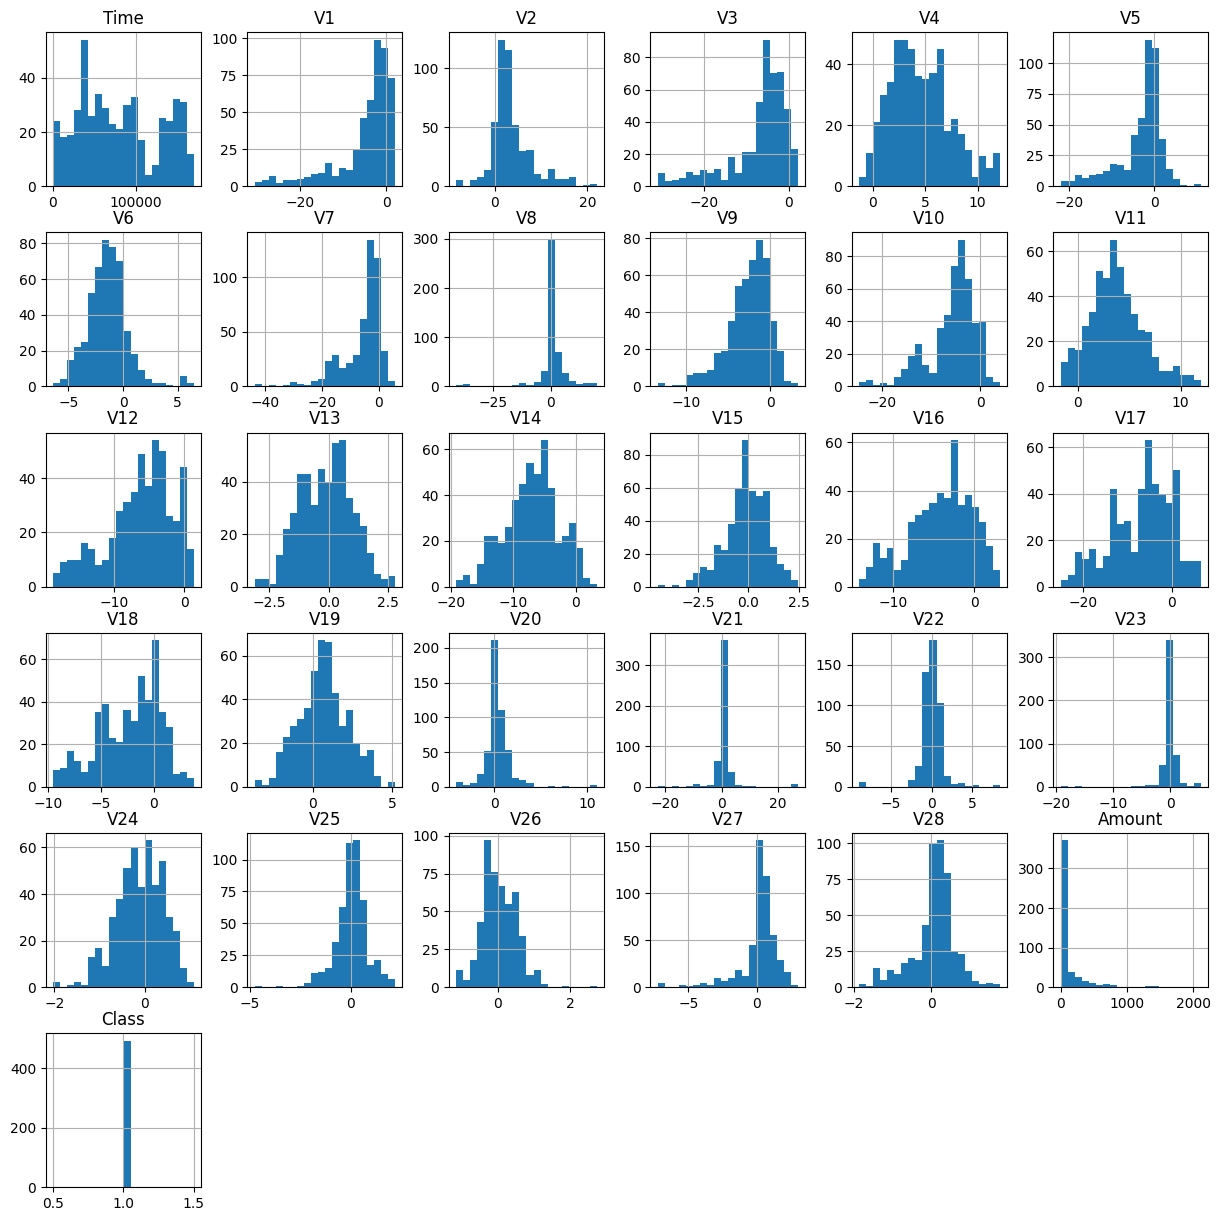

In [20]:
# 코드를 입력해 주세요
df[df['Class'] == 1].hist(figsize=(15, 15), bins=20)
plt.show()

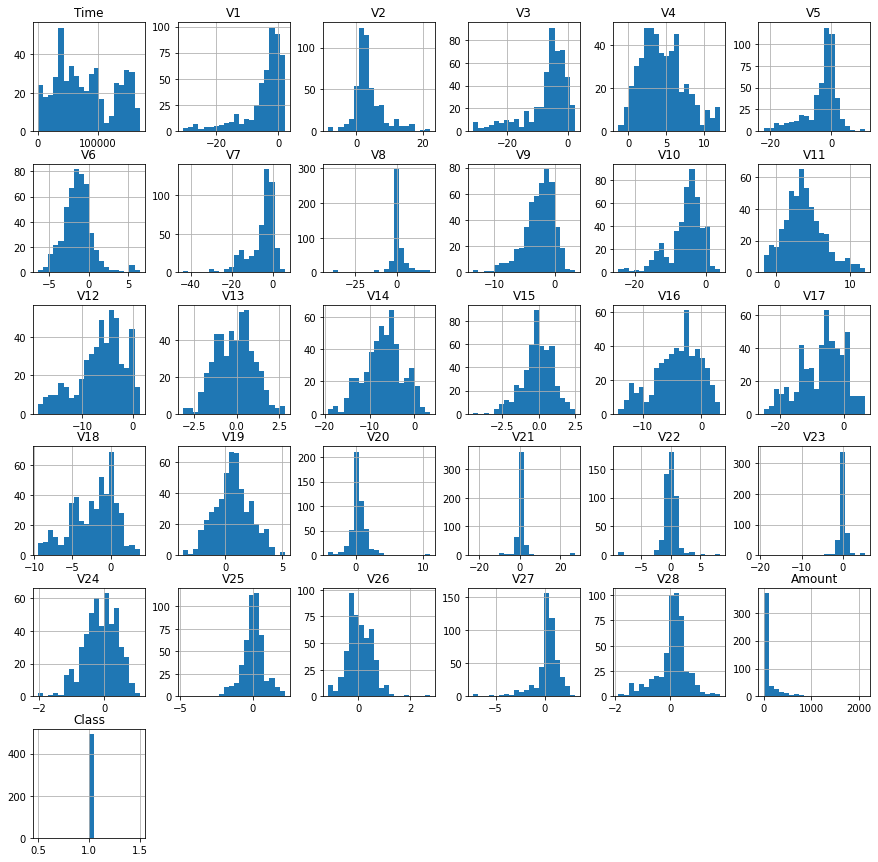

- 각 컬럼별 BoxPlot을 그려보세요
    - subplots=True, layout=(7, 5), figsize=(15,21) 사용

<p><strong>[출력 결과]</strong></p><pre><Figure size 1080x1080 with 36 Axes></pre>

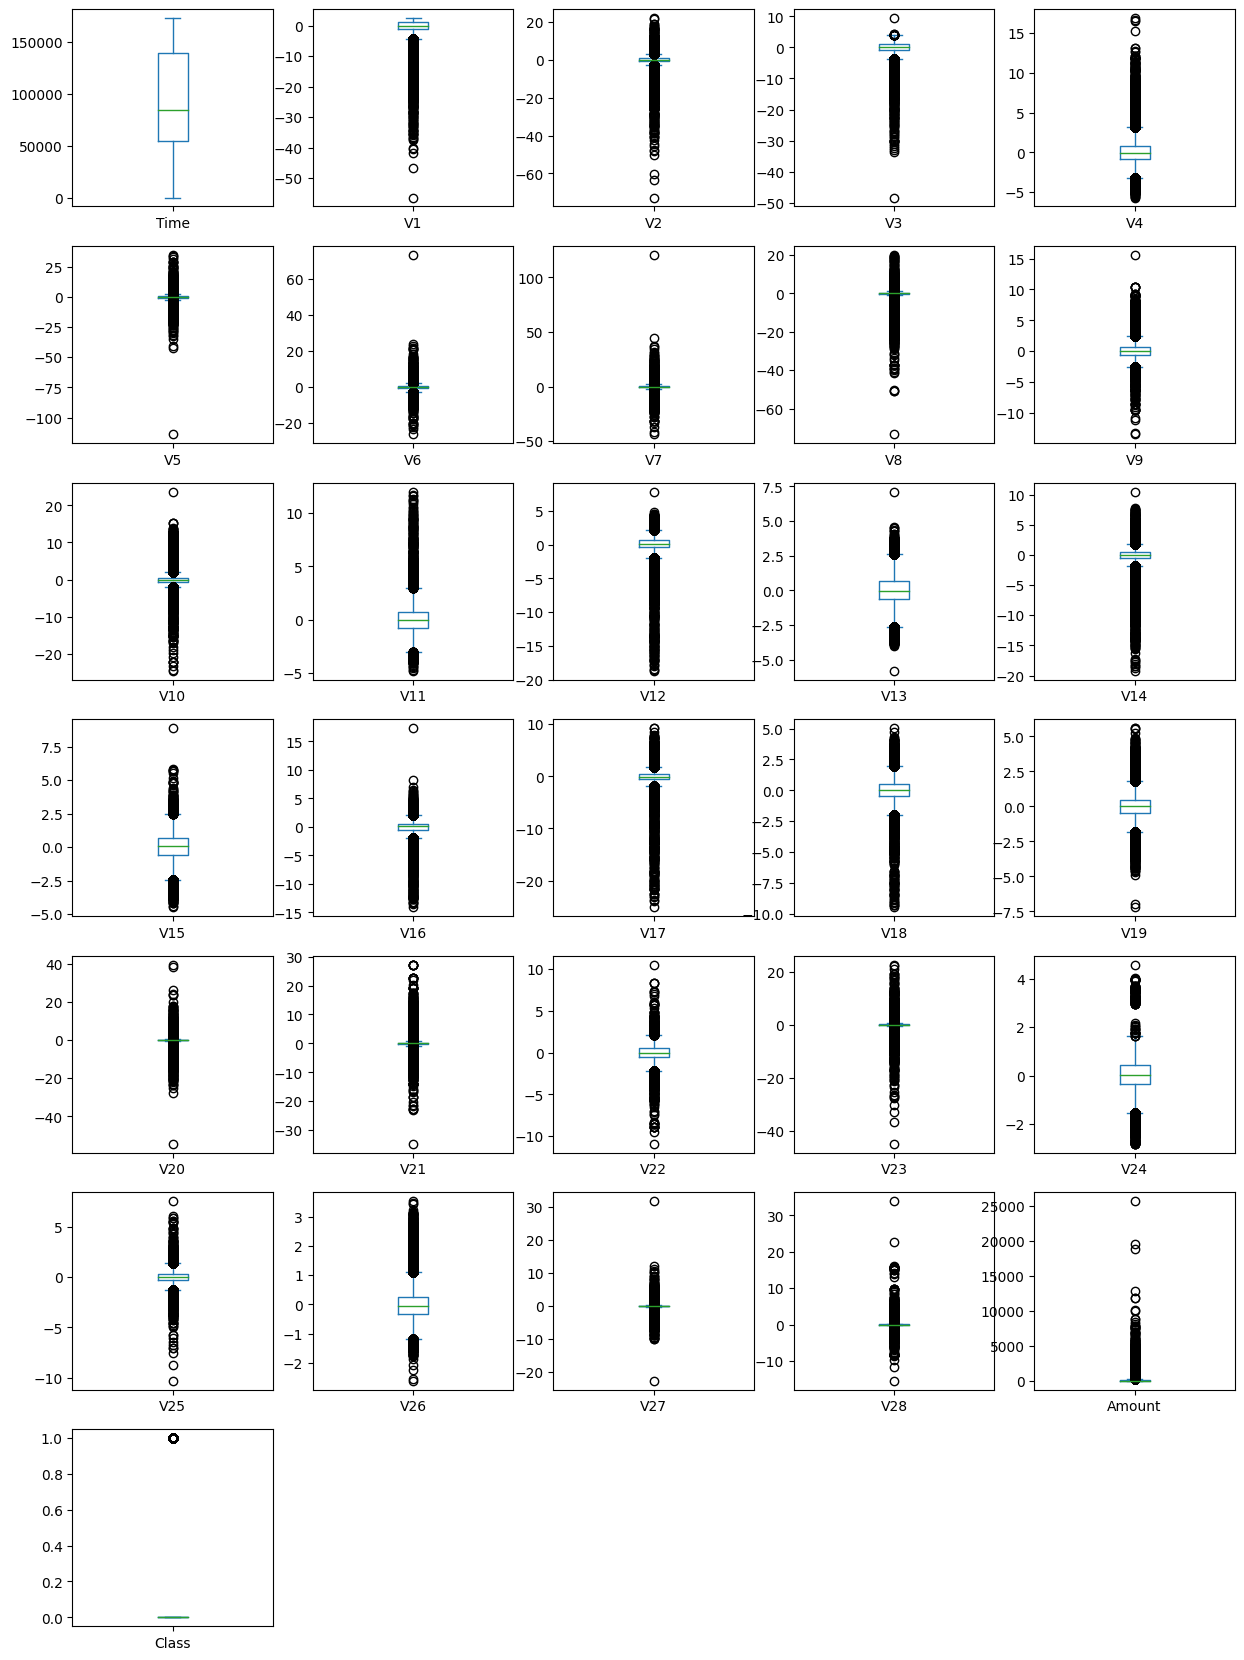

In [21]:
# 코드를 입력해 주세요
df.plot(kind = 'box', subplots = True, layout=(7,5), figsize=(15,21))
plt.show()

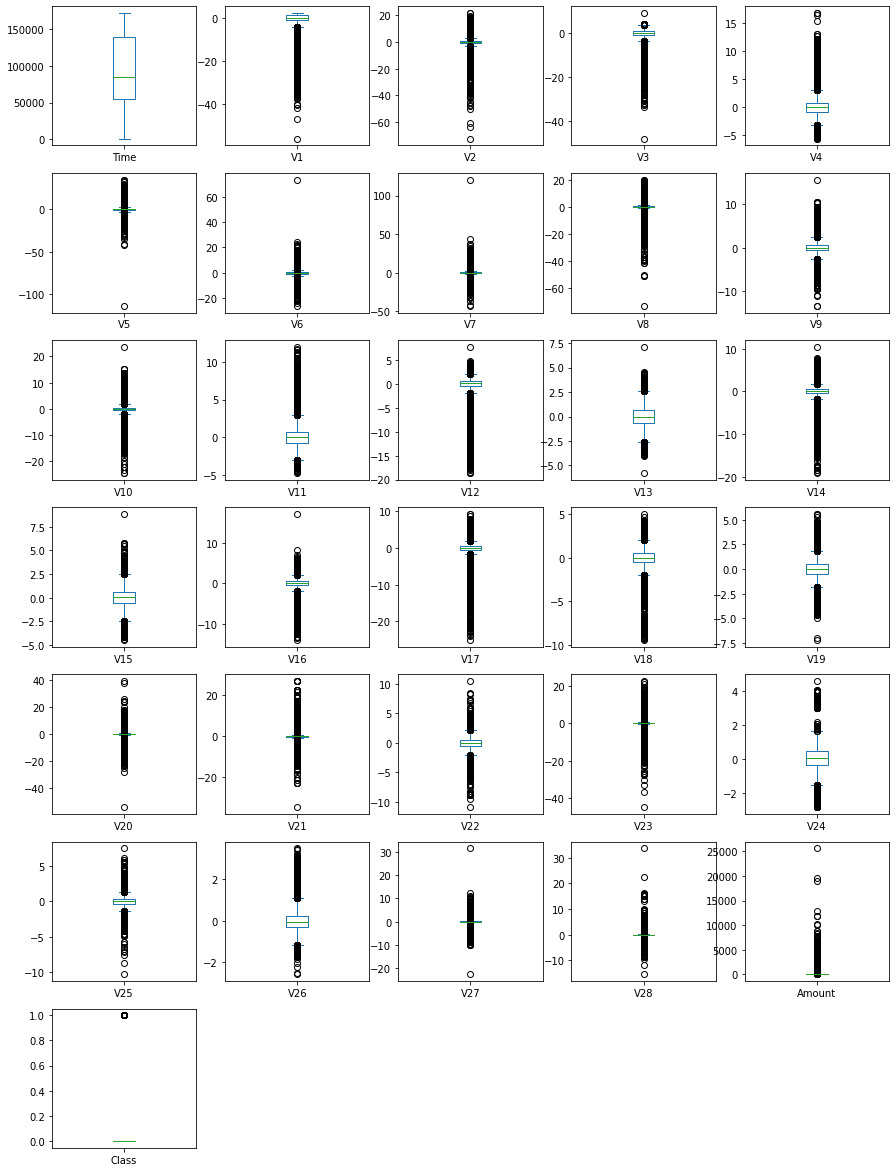

- Amount 컬럼의 분포를 시각화하세요
    - hist 함수 이용

<p><strong>[출력 결과]</strong></p><pre><Figure size 1080x1512 with 35 Axes></pre>

<AxesSubplot: >

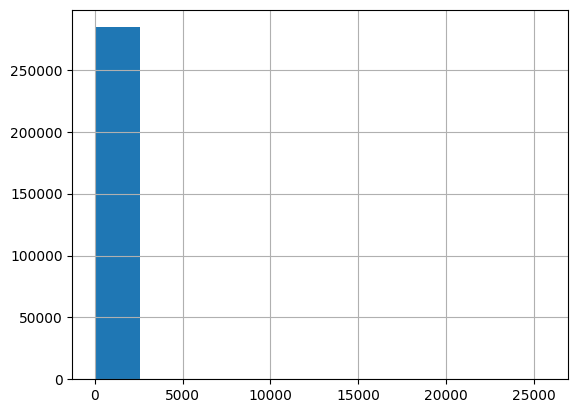

In [22]:
# 코드를 입력해 주세요
df['Amount'].hist()

# 스케일이 크다 -> 로그 변환을 취해주기도 함

<p><strong>[출력 결과]</strong></p><pre><AxesSubplot:></pre>

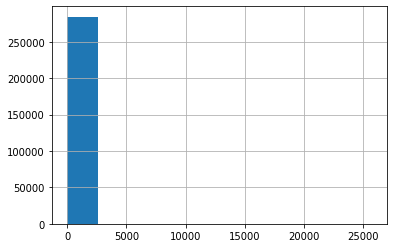

- np.log1p 함수를 이용하여 Amount_log 컬럼을 생성하세요

<p><strong>[출력 결과]</strong></p><pre><Figure size 432x288 with 1 Axes></pre>

In [23]:
# 코드를 입력해 주세요
df['Amount_log'] = np.log1p(df['Amount'])
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.014760
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.305626
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.939276
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.824306
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.262539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,0.570980
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,3.249987
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,4.232366
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,2.397895


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Time</th>
      <th>V1</th>
      <th>V2</th>
      <th>V3</th>
      <th>V4</th>
      <th>V5</th>
      <th>V6</th>
      <th>V7</th>
      <th>V8</th>
      <th>V9</th>
      <th>...</th>
      <th>V22</th>
      <th>V23</th>
      <th>V24</th>
      <th>V25</th>
      <th>V26</th>
      <th>V27</th>
      <th>V28</th>
      <th>Amount</th>
      <th>Class</th>
      <th>Amount_log</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.0</td>
      <td>-1.359807</td>
      <td>-0.072781</td>
      <td>2.536347</td>
      <td>1.378155</td>
      <td>-0.338321</td>
      <td>0.462388</td>
      <td>0.239599</td>
      <td>0.098698</td>
      <td>0.363787</td>
      <td>...</td>
      <td>0.277838</td>
      <td>-0.110474</td>
      <td>0.066928</td>
      <td>0.128539</td>
      <td>-0.189115</td>
      <td>0.133558</td>
      <td>-0.021053</td>
      <td>149.62</td>
      <td>0</td>
      <td>5.014760</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.0</td>
      <td>1.191857</td>
      <td>0.266151</td>
      <td>0.166480</td>
      <td>0.448154</td>
      <td>0.060018</td>
      <td>-0.082361</td>
      <td>-0.078803</td>
      <td>0.085102</td>
      <td>-0.255425</td>
      <td>...</td>
      <td>-0.638672</td>
      <td>0.101288</td>
      <td>-0.339846</td>
      <td>0.167170</td>
      <td>0.125895</td>
      <td>-0.008983</td>
      <td>0.014724</td>
      <td>2.69</td>
      <td>0</td>
      <td>1.305626</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1.0</td>
      <td>-1.358354</td>
      <td>-1.340163</td>
      <td>1.773209</td>
      <td>0.379780</td>
      <td>-0.503198</td>
      <td>1.800499</td>
      <td>0.791461</td>
      <td>0.247676</td>
      <td>-1.514654</td>
      <td>...</td>
      <td>0.771679</td>
      <td>0.909412</td>
      <td>-0.689281</td>
      <td>-0.327642</td>
      <td>-0.139097</td>
      <td>-0.055353</td>
      <td>-0.059752</td>
      <td>378.66</td>
      <td>0</td>
      <td>5.939276</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1.0</td>
      <td>-0.966272</td>
      <td>-0.185226</td>
      <td>1.792993</td>
      <td>-0.863291</td>
      <td>-0.010309</td>
      <td>1.247203</td>
      <td>0.237609</td>
      <td>0.377436</td>
      <td>-1.387024</td>
      <td>...</td>
      <td>0.005274</td>
      <td>-0.190321</td>
      <td>-1.175575</td>
      <td>0.647376</td>
      <td>-0.221929</td>
      <td>0.062723</td>
      <td>0.061458</td>
      <td>123.50</td>
      <td>0</td>
      <td>4.824306</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2.0</td>
      <td>-1.158233</td>
      <td>0.877737</td>
      <td>1.548718</td>
      <td>0.403034</td>
      <td>-0.407193</td>
      <td>0.095921</td>
      <td>0.592941</td>
      <td>-0.270533</td>
      <td>0.817739</td>
      <td>...</td>
      <td>0.798278</td>
      <td>-0.137458</td>
      <td>0.141267</td>
      <td>-0.206010</td>
      <td>0.502292</td>
      <td>0.219422</td>
      <td>0.215153</td>
      <td>69.99</td>
      <td>0</td>
      <td>4.262539</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>284802</th>
      <td>172786.0</td>
      <td>-11.881118</td>
      <td>10.071785</td>
      <td>-9.834783</td>
      <td>-2.066656</td>
      <td>-5.364473</td>
      <td>-2.606837</td>
      <td>-4.918215</td>
      <td>7.305334</td>
      <td>1.914428</td>
      <td>...</td>
      <td>0.111864</td>
      <td>1.014480</td>
      <td>-0.509348</td>
      <td>1.436807</td>
      <td>0.250034</td>
      <td>0.943651</td>
      <td>0.823731</td>
      <td>0.77</td>
      <td>0</td>
      <td>0.570980</td>
    </tr>
    <tr>
      <th>284803</th>
      <td>172787.0</td>
      <td>-0.732789</td>
      <td>-0.055080</td>
      <td>2.035030</td>
      <td>-0.738589</td>
      <td>0.868229</td>
      <td>1.058415</td>
      <td>0.024330</td>
      <td>0.294869</td>
      <td>0.584800</td>
      <td>...</td>
      <td>0.924384</td>
      <td>0.012463</td>
      <td>-1.016226</td>
      <td>-0.606624</td>
      <td>-0.395255</td>
      <td>0.068472</td>
      <td>-0.053527</td>
      <td>24.79</td>
      <td>0</td>
      <td>3.249987</td>
    </tr>
    <tr>
      <th>284804</th>
      <td>172788.0</td>
      <td>1.919565</td>
      <td>-0.301254</td>
      <td>-3.249640</td>
      <td>-0.557828</td>
      <td>2.630515</td>
      <td>3.031260</td>
      <td>-0.296827</td>
      <td>0.708417</td>
      <td>0.432454</td>
      <td>...</td>
      <td>0.578229</td>
      <td>-0.037501</td>
      <td>0.640134</td>
      <td>0.265745</td>
      <td>-0.087371</td>
      <td>0.004455</td>
      <td>-0.026561</td>
      <td>67.88</td>
      <td>0</td>
      <td>4.232366</td>
    </tr>
    <tr>
      <th>284805</th>
      <td>172788.0</td>
      <td>-0.240440</td>
      <td>0.530483</td>
      <td>0.702510</td>
      <td>0.689799</td>
      <td>-0.377961</td>
      <td>0.623708</td>
      <td>-0.686180</td>
      <td>0.679145</td>
      <td>0.392087</td>
      <td>...</td>
      <td>0.800049</td>
      <td>-0.163298</td>
      <td>0.123205</td>
      <td>-0.569159</td>
      <td>0.546668</td>
      <td>0.108821</td>
      <td>0.104533</td>
      <td>10.00</td>
      <td>0</td>
      <td>2.397895</td>
    </tr>
    <tr>
      <th>284806</th>
      <td>172792.0</td>
      <td>-0.533413</td>
      <td>-0.189733</td>
      <td>0.703337</td>
      <td>-0.506271</td>
      <td>-0.012546</td>
      <td>-0.649617</td>
      <td>1.577006</td>
      <td>-0.414650</td>
      <td>0.486180</td>
      <td>...</td>
      <td>0.643078</td>
      <td>0.376777</td>
      <td>0.008797</td>
      <td>-0.473649</td>
      <td>-0.818267</td>
      <td>-0.002415</td>
      <td>0.013649</td>
      <td>217.00</td>
      <td>0</td>
      <td>5.384495</td>
    </tr>
  </tbody>
</table>
<p>284807 rows × 32 columns</p>
</div>

- Amount_log 컬럼의 분포를 시각화하세요
    - hist 함수 이용

<AxesSubplot: >

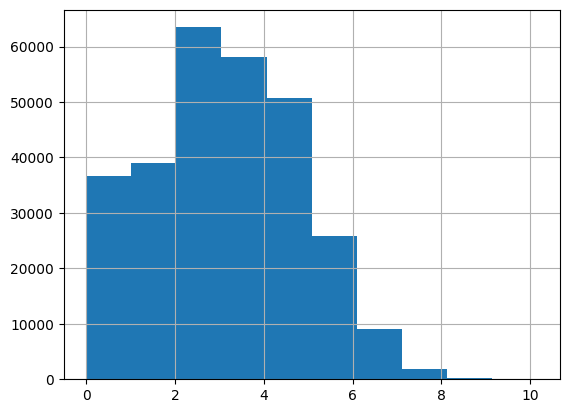

In [24]:
# 코드를 입력해 주세요
df['Amount_log'].hist()

# 스케일이 10까지로 안정화된 것을 볼 수 있다.

<p><strong>[출력 결과]</strong></p><pre><AxesSubplot:></pre>

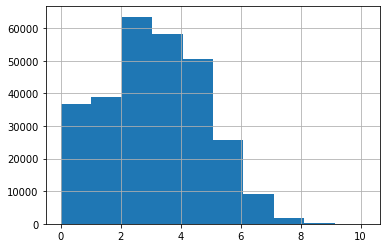

- class 컬럼의 값인 1인 데이터 프레임을 추출 후 Time 컬럼을 hist 함수를 이용하여 시각화 하세요.
- class 컬럼의 값인 0인 데이터 프레임을 추출 후 Time 컬럼을 hist 함수를 이용하여 시각화 하세요.
- subplot을 이용하세요.

<p><strong>[출력 결과]</strong></p><pre><Figure size 432x288 with 1 Axes></pre>

Text(0.5, 1.0, 'Normal')

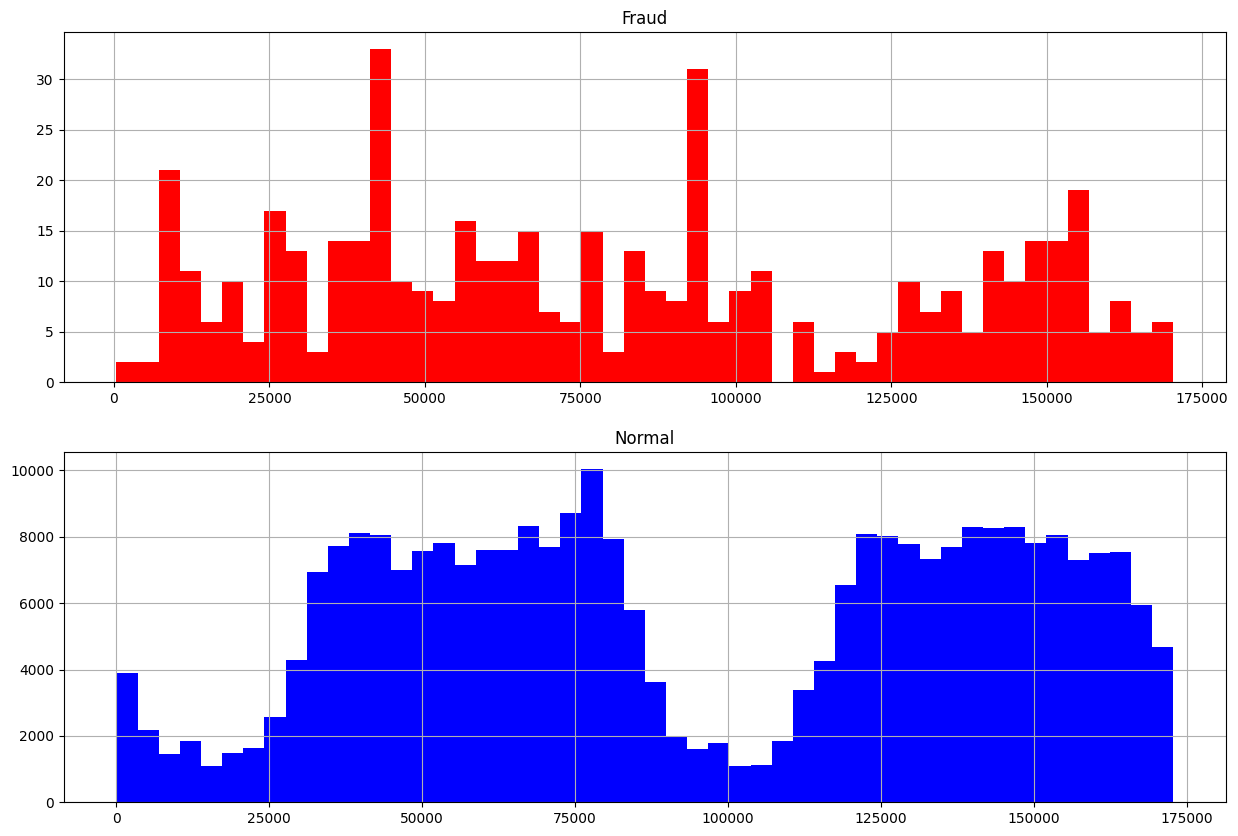

In [25]:
# 코드를 입력해 주세요
plt.figure(figsize = (15, 10))
plt.subplot(2, 1, 1)
df.loc[df['Class'] == 1, 'Time'].hist(bins = 50, color = 'r')
plt.title('Fraud')
plt.subplot(2, 1, 2)
df.loc[df['Class'] == 0, 'Time'].hist(bins=50, color = 'b')
plt.title('Normal')

# 특정 시간에 연체/미연체가 집중되는 것은 없다고 판단할 수 있다.

<p><strong>[출력 결과]</strong></p><pre>Text(0.5, 1.0, 'Normal')</pre>

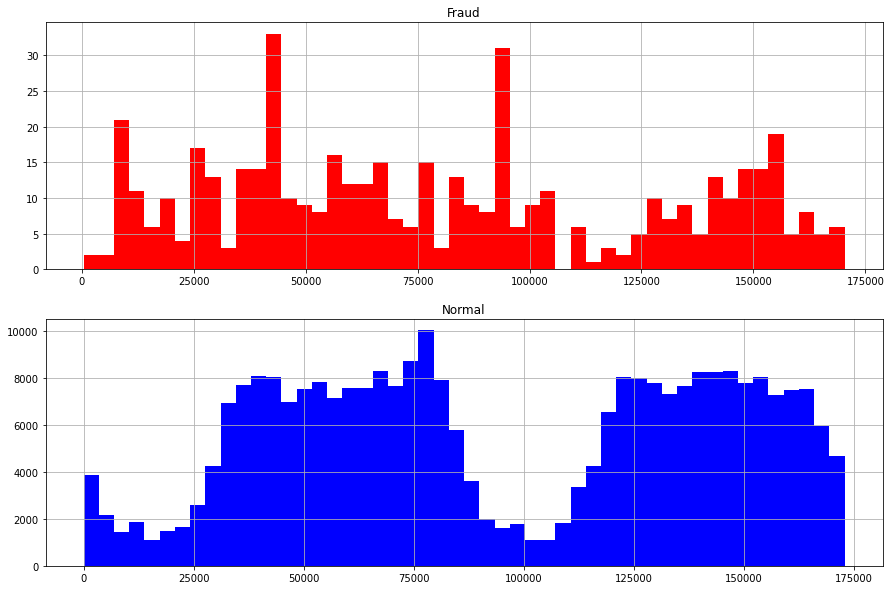

- class 컬럼의 값인 1인 데이터 프레임을 추출 후 Time 컬럼을 scatter 함수를 이용하여 시각화 하세요.
    - plot 함수를 사용하세요.
    - kind='scatter', x='Time', y='Amount', color='r'을 사용하세요.

<p><strong>[출력 결과]</strong></p><pre><Figure size 1080x720 with 2 Axes></pre>

/home/elicer/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Fraud')

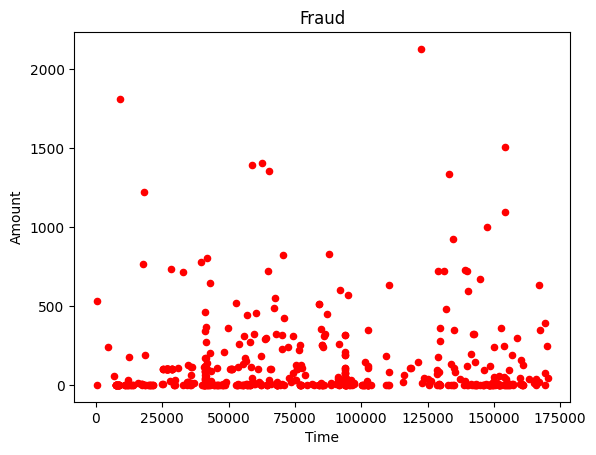

In [26]:
# 코드를 입력해 주세요
df.loc[df['Class'] == 1].plot(kind='scatter', x='Time', y='Amount', color = 'r')
plt.title('Fraud')

# 거래량에 따라서 차이가 있는지 본다.

<p><strong>[출력 결과]</strong></p><pre>Text(0.5, 1.0, 'Fraud')</pre>

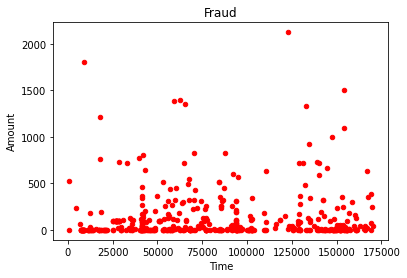

- class 컬럼의 값인 0인 데이터 프레임을 추출 후 Time 컬럼을 scatter 함수를 이용하여 시각화 하세요.
    - plot 함수를 사용하세요.
    - kind='scatter', x='Time', y='Amount', color='b'을 사용하세요.

<p><strong>[출력 결과]</strong></p><pre><Figure size 432x288 with 1 Axes></pre>

Text(0.5, 1.0, 'Normal')

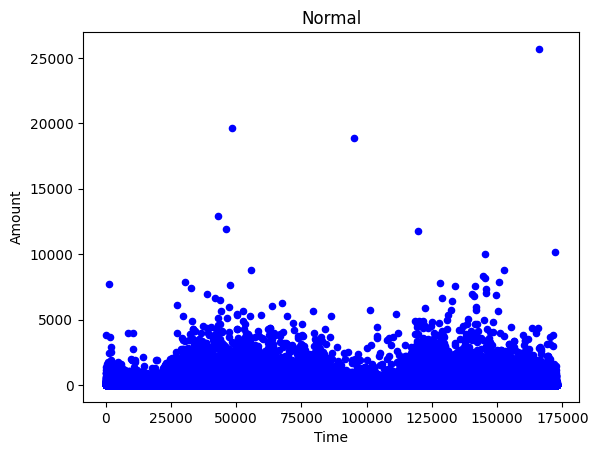

In [28]:
# 코드를 입력해 주세요
df.loc[df['Class'] == 0].plot(kind='scatter', x='Time', y='Amount', color = 'b')
plt.title('Normal')

# 값이 크다고 해서 연체를 하는 것은 아님을 알 수 있다.

<p><strong>[출력 결과]</strong></p><pre>Text(0.5, 1.0, 'Normal')</pre>

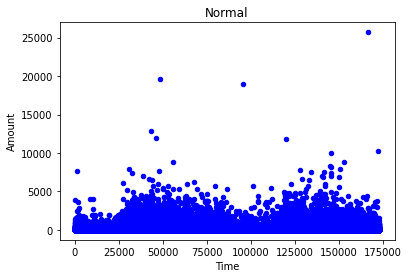

- 데이터 프레임의 상관관계를 계산하세요

<p><strong>[출력 결과]</strong></p><pre><Figure size 432x288 with 1 Axes></pre>

In [30]:
# 코드를 입력해 주세요
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_log
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323,-0.028515
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347,-0.096375
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289,-0.450317
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961,-0.033913
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447,-0.004677
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974,-0.286189
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643,0.163822
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257,0.095758
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875,-0.020690
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733,-0.080498


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Time</th>
      <th>V1</th>
      <th>V2</th>
      <th>V3</th>
      <th>V4</th>
      <th>V5</th>
      <th>V6</th>
      <th>V7</th>
      <th>V8</th>
      <th>V9</th>
      <th>...</th>
      <th>V22</th>
      <th>V23</th>
      <th>V24</th>
      <th>V25</th>
      <th>V26</th>
      <th>V27</th>
      <th>V28</th>
      <th>Amount</th>
      <th>Class</th>
      <th>Amount_log</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Time</th>
      <td>1.000000</td>
      <td>1.173963e-01</td>
      <td>-1.059333e-02</td>
      <td>-4.196182e-01</td>
      <td>-1.052602e-01</td>
      <td>1.730721e-01</td>
      <td>-6.301647e-02</td>
      <td>8.471437e-02</td>
      <td>-3.694943e-02</td>
      <td>-8.660434e-03</td>
      <td>...</td>
      <td>1.440591e-01</td>
      <td>5.114236e-02</td>
      <td>-1.618187e-02</td>
      <td>-2.330828e-01</td>
      <td>-4.140710e-02</td>
      <td>-5.134591e-03</td>
      <td>-9.412688e-03</td>
      <td>-0.010596</td>
      <td>-0.012323</td>
      <td>-0.028515</td>
    </tr>
    <tr>
      <th>V1</th>
      <td>0.117396</td>
      <td>1.000000e+00</td>
      <td>4.135835e-16</td>
      <td>-1.227819e-15</td>
      <td>-9.215150e-16</td>
      <td>1.812612e-17</td>
      <td>-6.506567e-16</td>
      <td>-1.005191e-15</td>
      <td>-2.433822e-16</td>
      <td>-1.513678e-16</td>
      <td>...</td>
      <td>-4.290944e-16</td>
      <td>6.168652e-16</td>
      <td>-4.425156e-17</td>
      <td>-9.605737e-16</td>
      <td>-1.581290e-17</td>
      <td>1.198124e-16</td>
      <td>2.083082e-15</td>
      <td>-0.227709</td>
      <td>-0.101347</td>
      <td>-0.096375</td>
    </tr>
    <tr>
      <th>V2</th>
      <td>-0.010593</td>
      <td>4.135835e-16</td>
      <td>1.000000e+00</td>
      <td>3.243764e-16</td>
      <td>-1.121065e-15</td>
      <td>5.157519e-16</td>
      <td>2.787346e-16</td>
      <td>2.055934e-16</td>
      <td>-5.377041e-17</td>
      <td>1.978488e-17</td>
      <td>...</td>
      <td>1.526333e-16</td>
      <td>1.634231e-16</td>
      <td>1.247925e-17</td>
      <td>-4.478846e-16</td>
      <td>2.057310e-16</td>
      <td>-4.966953e-16</td>
      <td>-5.093836e-16</td>
      <td>-0.531409</td>
      <td>0.091289</td>
      <td>-0.450317</td>
    </tr>
    <tr>
      <th>V3</th>
      <td>-0.419618</td>
      <td>-1.227819e-15</td>
      <td>3.243764e-16</td>
      <td>1.000000e+00</td>
      <td>4.711293e-16</td>
      <td>-6.539009e-17</td>
      <td>1.627627e-15</td>
      <td>4.895305e-16</td>
      <td>-1.268779e-15</td>
      <td>5.568367e-16</td>
      <td>...</td>
      <td>-1.133902e-15</td>
      <td>-4.983035e-16</td>
      <td>2.686834e-19</td>
      <td>-1.104734e-15</td>
      <td>-1.238062e-16</td>
      <td>1.045747e-15</td>
      <td>9.775546e-16</td>
      <td>-0.210880</td>
      <td>-0.192961</td>
      <td>-0.033913</td>
    </tr>
    <tr>
      <th>V4</th>
      <td>-0.105260</td>
      <td>-9.215150e-16</td>
      <td>-1.121065e-15</td>
      <td>4.711293e-16</td>
      <td>1.000000e+00</td>
      <td>-1.719944e-15</td>
      <td>-7.491959e-16</td>
      <td>-4.104503e-16</td>
      <td>5.697192e-16</td>
      <td>6.923247e-16</td>
      <td>...</td>
      <td>-6.276051e-17</td>
      <td>9.164206e-17</td>
      <td>1.584638e-16</td>
      <td>6.070716e-16</td>
      <td>-4.247268e-16</td>
      <td>3.977061e-17</td>
      <td>-2.761403e-18</td>
      <td>0.098732</td>
      <td>0.133447</td>
      <td>-0.004677</td>
    </tr>
    <tr>
      <th>V5</th>
      <td>0.173072</td>
      <td>1.812612e-17</td>
      <td>5.157519e-16</td>
      <td>-6.539009e-17</td>
      <td>-1.719944e-15</td>
      <td>1.000000e+00</td>
      <td>2.408382e-16</td>
      <td>2.715541e-16</td>
      <td>7.437229e-16</td>
      <td>7.391702e-16</td>
      <td>...</td>
      <td>1.253751e-16</td>
      <td>-8.428683e-18</td>
      <td>-1.149255e-15</td>
      <td>4.808532e-16</td>
      <td>4.319541e-16</td>
      <td>6.590482e-16</td>
      <td>-5.613951e-18</td>
      <td>-0.386356</td>
      <td>-0.094974</td>
      <td>-0.286189</td>
    </tr>
    <tr>
      <th>V6</th>
      <td>-0.063016</td>
      <td>-6.506567e-16</td>
      <td>2.787346e-16</td>
      <td>1.627627e-15</td>
      <td>-7.491959e-16</td>
      <td>2.408382e-16</td>
      <td>1.000000e+00</td>
      <td>1.191668e-16</td>
      <td>-1.104219e-16</td>
      <td>4.131207e-16</td>
      <td>...</td>
      <td>-4.705235e-19</td>
      <td>1.046712e-16</td>
      <td>-1.071589e-15</td>
      <td>4.562861e-16</td>
      <td>-1.357067e-16</td>
      <td>-4.452461e-16</td>
      <td>2.594754e-16</td>
      <td>0.215981</td>
      <td>-0.043643</td>
      <td>0.163822</td>
    </tr>
    <tr>
      <th>V7</th>
      <td>0.084714</td>
      <td>-1.005191e-15</td>
      <td>2.055934e-16</td>
      <td>4.895305e-16</td>
      <td>-4.104503e-16</td>
      <td>2.715541e-16</td>
      <td>1.191668e-16</td>
      <td>1.000000e+00</td>
      <td>3.344412e-16</td>
      <td>1.122501e-15</td>
      <td>...</td>
      <td>-8.898922e-16</td>
      <td>-4.387401e-16</td>
      <td>7.434913e-18</td>
      <td>-3.094082e-16</td>
      <td>-9.657637e-16</td>
      <td>-1.782106e-15</td>
      <td>-2.776530e-16</td>
      <td>0.397311</td>
      <td>-0.187257</td>
      <td>0.095758</td>
    </tr>
    <tr>
      <th>V8</th>
      <td>-0.036949</td>
      <td>-2.433822e-16</td>
      <td>-5.377041e-17</td>
      <td>-1.268779e-15</td>
      <td>5.697192e-16</td>
      <td>7.437229e-16</td>
      <td>-1.104219e-16</td>
      <td>3.344412e-16</td>
      <td>1.000000e+00</td>
      <td>4.356078e-16</td>
      <td>...</td>
      <td>2.026927e-16</td>
      <td>6.377260e-17</td>
      <td>-1.047097e-16</td>
      <td>-4.653279e-16</td>
      <td>-1.727276e-16</td>
      <td>1.299943e-16</td>
      <td>-6.200930e-16</td>
      <td>-0.103079</td>
      <td>0.019875</td>
      <td>-0.020690</td>
    </tr>
    <tr>
      <th>V9</th>
      <td>-0.008660</td>
      <td>-1.513678e-16</td>
      <td>1.978488e-17</td>
      <td>5.568367e-16</td>
      <td>6.923247e-16</td>
      <td>7.391702e-16</td>
      <td>4.131207e-16</td>
      <td>1.122501e-15</td>
      <td>4.356078e-16</td>
      <td>1.000000e+00</td>
      <td>...</td>
      <td>-7.071869e-16</td>
      <td>-5.214137e-16</td>
      <td>-1.430343e-16</td>
      <td>6.757763e-16</td>
      <td>-7.888853e-16</td>
      <td>-6.709655e-17</td>
      <td>1.110541e-15</td>
      <td>-0.044246</td>
      <td>-0.097733</td>
      <td>-0.080498</td>
    </tr>
    <tr>
      <th>V10</th>
      <td>0.030617</td>
      <td>7.388135e-17</td>
      <td>-3.991394e-16</td>
      <td>1.156587e-15</td>
      <td>2.232685e-16</td>
      <td>-5.202306e-16</td>
      <td>5.932243e-17</td>
      <td>-7.492834e-17</td>
      <td>-2.801370e-16</td>
      <td>-4.642274e-16</td>
      <td>...</td>
      <td>-6.418202e-16</td>
      <td>3.214491e-16</td>
      <td>-1.355885e-16</td>
      <td>-2.846052e-16</td>
      <td>-3.028119e-16</td>
      <td>-2.197977e-16</td>
      <td>4.864782e-17</td>
      <td>-0.101502</td>
      <td>-0.216883</td>
      <td>-0.009621</td>
    </tr>
    <tr>
      <th>V11</th>
      <td>-0.247689</td>
      <td>2.125498e-16</td>
      <td>1.975426e-16</td>
      <td>1.576830e-15</td>
      <td>3.459380e-16</td>
      <td>7.203963e-16</td>
      <td>1.980503e-15</td>
      <td>1.425248e-16</td>
      <td>2.487043e-16</td>
      <td>1.354680e-16</td>
      <td>...</td>
      <td>7.772895e-16</td>
      <td>-4.505332e-16</td>
      <td>1.933267e-15</td>
      <td>-5.600475e-16</td>
      <td>-1.003221e-16</td>
      <td>-2.640281e-16</td>
      <td>-3.792314e-16</td>
      <td>0.000104</td>
      <td>0.154876</td>
      <td>-0.049182</td>
    </tr>
    <tr>
      <th>V12</th>
      <td>0.124348</td>
      <td>2.053457e-16</td>
      <td>-9.568710e-17</td>
      <td>6.310231e-16</td>
      <td>-5.625518e-16</td>
      <td>7.412552e-16</td>
      <td>2.375468e-16</td>
      <td>-3.536655e-18</td>
      <td>1.839891e-16</td>
      <td>-1.079314e-15</td>
      <td>...</td>
      <td>1.644699e-16</td>
      <td>1.800885e-16</td>
      <td>4.436512e-16</td>
      <td>-5.712973e-16</td>
      <td>-2.359969e-16</td>
      <td>-4.672391e-16</td>
      <td>6.415167e-16</td>
      <td>-0.009542</td>
      <td>-0.260593</td>
      <td>-0.018930</td>
    </tr>
    <tr>
      <th>V13</th>
      <td>-0.065902</td>
      <td>-2.425603e-17</td>
      <td>6.295388e-16</td>
      <td>2.807652e-16</td>
      <td>1.303306e-16</td>
      <td>5.886991e-16</td>
      <td>-1.211182e-16</td>
      <td>1.266462e-17</td>
      <td>-2.921856e-16</td>
      <td>2.251072e-15</td>
      <td>...</td>
      <td>6.747721e-17</td>
      <td>-7.132064e-16</td>
      <td>-1.397470e-16</td>
      <td>-5.497612e-16</td>
      <td>-1.769255e-16</td>
      <td>-4.720898e-16</td>
      <td>1.144372e-15</td>
      <td>0.005293</td>
      <td>-0.004570</td>
      <td>-0.002660</td>
    </tr>
    <tr>
      <th>V14</th>
      <td>-0.098757</td>
      <td>-5.020280e-16</td>
      <td>-1.730566e-16</td>
      <td>4.739859e-16</td>
      <td>2.282280e-16</td>
      <td>6.565143e-16</td>
      <td>2.621312e-16</td>
      <td>2.607772e-16</td>
      <td>-8.599156e-16</td>
      <td>3.784757e-15</td>
      <td>...</td>
      <td>3.740383e-16</td>
      <td>3.883204e-16</td>
      <td>2.003482e-16</td>
      <td>-8.547932e-16</td>
      <td>-1.660327e-16</td>
      <td>1.044274e-16</td>
      <td>2.289427e-15</td>
      <td>0.033751</td>
      <td>-0.302544</td>
      <td>0.024120</td>
    </tr>
    <tr>
      <th>V15</th>
      <td>-0.183453</td>
      <td>3.547782e-16</td>
      <td>-4.995814e-17</td>
      <td>9.068793e-16</td>
      <td>1.377649e-16</td>
      <td>-8.720275e-16</td>
      <td>-1.531188e-15</td>
      <td>-1.690540e-16</td>
      <td>4.127777e-16</td>
      <td>-1.051167e-15</td>
      <td>...</td>
      <td>-4.208921e-16</td>
      <td>-3.912243e-16</td>
      <td>-4.478263e-16</td>
      <td>3.206423e-16</td>
      <td>2.817791e-16</td>
      <td>-1.143519e-15</td>
      <td>-1.194130e-15</td>
      <td>-0.002986</td>
      <td>-0.004223</td>
      <td>-0.066270</td>
    </tr>
    <tr>
      <th>V16</th>
      <td>0.011903</td>
      <td>7.212815e-17</td>
      <td>1.177316e-17</td>
      <td>8.299445e-16</td>
      <td>-9.614528e-16</td>
      <td>2.246261e-15</td>
      <td>2.623672e-18</td>
      <td>5.869302e-17</td>
      <td>-5.254741e-16</td>
      <td>-1.214086e-15</td>
      <td>...</td>
      <td>-7.923387e-17</td>
      <td>5.020770e-16</td>
      <td>-3.005985e-16</td>
      <td>-1.345418e-15</td>
      <td>-7.290010e-16</td>
      <td>6.789513e-16</td>
      <td>7.588849e-16</td>
      <td>-0.003910</td>
      <td>-0.196539</td>
      <td>-0.099295</td>
    </tr>
    <tr>
      <th>V17</th>
      <td>-0.073297</td>
      <td>-3.879840e-16</td>
      <td>-2.685296e-16</td>
      <td>7.614712e-16</td>
      <td>-2.699612e-16</td>
      <td>1.281914e-16</td>
      <td>2.015618e-16</td>
      <td>2.177192e-16</td>
      <td>-2.269549e-16</td>
      <td>1.113695e-15</td>
      <td>...</td>
      <td>-8.743398e-16</td>
      <td>3.706214e-16</td>
      <td>-2.403828e-16</td>
      <td>2.666806e-16</td>
      <td>6.932833e-16</td>
      <td>6.148525e-16</td>
      <td>-5.534540e-17</td>
      <td>0.007309</td>
      <td>-0.326481</td>
      <td>0.017123</td>
    </tr>
    <tr>
      <th>V18</th>
      <td>0.090438</td>
      <td>3.230206e-17</td>
      <td>3.284605e-16</td>
      <td>1.509897e-16</td>
      <td>-5.103644e-16</td>
      <td>5.308590e-16</td>
      <td>1.223814e-16</td>
      <td>7.604126e-17</td>
      <td>-3.667974e-16</td>
      <td>4.993240e-16</td>
      <td>...</td>
      <td>-4.819365e-16</td>
      <td>-1.912006e-16</td>
      <td>-8.986916e-17</td>
      <td>-6.629212e-17</td>
      <td>2.990167e-16</td>
      <td>2.242791e-16</td>
      <td>7.976796e-16</td>
      <td>0.035650</td>
      <td>-0.111485</td>
      <td>0.042916</td>
    </tr>
    <tr>
      <th>V19</th>
      <td>0.028975</td>
      <td>1.502024e-16</td>
      <td>-7.118719e-18</td>
      <td>3.463522e-16</td>
      <td>-3.980557e-16</td>
      <td>-1.450421e-16</td>
      <td>-1.865597e-16</td>
      <td>-1.881008e-16</td>
      <td>-3.875186e-16</td>
      <td>-1.376135e-16</td>
      <td>...</td>
      <td>-1.163768e-15</td>
      <td>7.032035e-16</td>
      <td>2.587708e-17</td>
      <td>9.577163e-16</td>
      <td>5.898033e-16</td>
      <td>-2.959370e-16</td>
      <td>-1.405379e-15</td>
      <td>-0.056151</td>
      <td>0.034783</td>
      <td>-0.016127</td>
    </tr>
    <tr>
      <th>V20</th>
      <td>-0.050866</td>
      <td>4.654551e-16</td>
      <td>2.506675e-16</td>
      <td>-9.316409e-16</td>
      <td>-1.857247e-16</td>
      <td>-3.554057e-16</td>
      <td>-1.858755e-16</td>
      <td>9.379684e-16</td>
      <td>2.033737e-16</td>
      <td>-2.343720e-16</td>
      <td>...</td>
      <td>1.009285e-15</td>
      <td>2.712885e-16</td>
      <td>1.277215e-16</td>
      <td>1.410054e-16</td>
      <td>-2.803504e-16</td>
      <td>-1.138829e-15</td>
      <td>-2.436795e-16</td>
      <td>0.339403</td>
      <td>0.020090</td>
      <td>0.144731</td>
    </tr>
    <tr>
      <th>V21</th>
      <td>0.044736</td>
      <td>-2.457409e-16</td>
      <td>-8.480447e-17</td>
      <td>5.706192e-17</td>
      <td>-1.949553e-16</td>
      <td>-3.920976e-16</td>
      <td>5.833316e-17</td>
      <td>-2.027779e-16</td>
      <td>3.892798e-16</td>
      <td>1.936953e-16</td>
      <td>...</td>
      <td>3.649908e-15</td>
      <td>8.119580e-16</td>
      <td>1.761054e-16</td>
      <td>-1.686082e-16</td>
      <td>-5.557329e-16</td>
      <td>-1.211281e-15</td>
      <td>5.278775e-16</td>
      <td>0.105999</td>
      <td>0.040413</td>
      <td>0.084379</td>
    </tr>
    <tr>
      <th>V22</th>
      <td>0.144059</td>
      <td>-4.290944e-16</td>
      <td>1.526333e-16</td>
      <td>-1.133902e-15</td>
      <td>-6.276051e-17</td>
      <td>1.253751e-16</td>
      <td>-4.705235e-19</td>
      <td>-8.898922e-16</td>
      <td>2.026927e-16</td>
      <td>-7.071869e-16</td>
      <td>...</td>
      <td>1.000000e+00</td>
      <td>-7.303916e-17</td>
      <td>9.970809e-17</td>
      <td>-5.018575e-16</td>
      <td>-2.503187e-17</td>
      <td>8.461337e-17</td>
      <td>-6.627203e-16</td>
      <td>-0.064801</td>
      <td>0.000805</td>
      <td>0.044661</td>
    </tr>
    <tr>
      <th>V23</th>
      <td>0.051142</td>
      <td>6.168652e-16</td>
      <td>1.634231e-16</td>
      <td>-4.983035e-16</td>
      <td>9.164206e-17</td>
      <td>-8.428683e-18</td>
      <td>1.046712e-16</td>
      <td>-4.387401e-16</td>
      <td>6.377260e-17</td>
      <td>-5.214137e-16</td>
      <td>...</td>
      <td>-7.303916e-17</td>
      <td>1.000000e+00</td>
      <td>2.130519e-17</td>
      <td>-8.232727e-17</td>
      <td>1.114524e-15</td>
      <td>2.839721e-16</td>
      <td>1.481903e-15</td>
      <td>-0.112633</td>
      <td>-0.002685</td>
      <td>-0.029892</td>
    </tr>
    <tr>
      <th>V24</th>
      <td>-0.016182</td>
      <td>-4.425156e-17</td>
      <td>1.247925e-17</td>
      <td>2.686834e-19</td>
      <td>1.584638e-16</td>
      <td>-1.149255e-15</td>
      <td>-1.071589e-15</td>
      <td>7.434913e-18</td>
      <td>-1.047097e-16</td>
      <td>-1.430343e-16</td>
      <td>...</td>
      <td>9.970809e-17</td>
      <td>2.130519e-17</td>
      <td>1.000000e+00</td>
      <td>1.015391e-15</td>
      <td>1.343722e-16</td>
      <td>-2.274142e-16</td>
      <td>-2.819805e-16</td>
      <td>0.005146</td>
      <td>-0.007221</td>
      <td>-0.015484</td>
    </tr>
    <tr>
      <th>V25</th>
      <td>-0.233083</td>
      <td>-9.605737e-16</td>
      <td>-4.478846e-16</td>
      <td>-1.104734e-15</td>
      <td>6.070716e-16</td>
      <td>4.808532e-16</td>
      <td>4.562861e-16</td>
      <td>-3.094082e-16</td>
      <td>-4.653279e-16</td>
      <td>6.757763e-16</td>
      <td>...</td>
      <td>-5.018575e-16</td>
      <td>-8.232727e-17</td>
      <td>1.015391e-15</td>
      <td>1.000000e+00</td>
      <td>2.646517e-15</td>
      <td>-6.406679e-16</td>
      <td>-7.008939e-16</td>
      <td>-0.047837</td>
      <td>0.003308</td>
      <td>-0.003326</td>
    </tr>
    <tr>
      <th>V26</th>
      <td>-0.041407</td>
      <td>-1.581290e-17</td>
      <td>2.057310e-16</td>
      <td>-1.238062e-16</td>
      <td>-4.247268e-16</td>
      <td>4.319541e-16</td>
      <td>-1.357067e-16</td>
      <td>-9.657637e-16</td>
      <td>-1.727276e-16</td>
      <td>-7.888853e-16</td>
      <td>...</td>
      <td>-2.503187e-17</td>
      <td>1.114524e-15</td>
      <td>1.343722e-16</td>
      <td>2.646517e-15</td>
      <td>1.000000e+00</td>
      <td>-3.667715e-16</td>
      <td>-2.782204e-16</td>
      <td>-0.003208</td>
      <td>0.004455</td>
      <td>-0.015035</td>
    </tr>
    <tr>
      <th>V27</th>
      <td>-0.005135</td>
      <td>1.198124e-16</td>
      <td>-4.966953e-16</td>
      <td>1.045747e-15</td>
      <td>3.977061e-17</td>
      <td>6.590482e-16</td>
      <td>-4.452461e-16</td>
      <td>-1.782106e-15</td>
      <td>1.299943e-16</td>
      <td>-6.709655e-17</td>
      <td>...</td>
      <td>8.461337e-17</td>
      <td>2.839721e-16</td>
      <td>-2.274142e-16</td>
      <td>-6.406679e-16</td>
      <td>-3.667715e-16</td>
      <td>1.000000e+00</td>
      <td>-3.061287e-16</td>
      <td>0.028825</td>
      <td>0.017580</td>
      <td>-0.044270</td>
    </tr>
    <tr>
      <th>V28</th>
      <td>-0.009413</td>
      <td>2.083082e-15</td>
      <td>-5.093836e-16</td>
      <td>9.775546e-16</td>
      <td>-2.761403e-18</td>
      <td>-5.613951e-18</td>
      <td>2.594754e-16</td>
      <td>-2.776530e-16</td>
      <td>-6.200930e-16</td>
      <td>1.110541e-15</td>
      <td>...</td>
      <td>-6.627203e-16</td>
      <td>1.481903e-15</td>
      <td>-2.819805e-16</td>
      <td>-7.008939e-16</td>
      <td>-2.782204e-16</td>
      <td>-3.061287e-16</td>
      <td>1.000000e+00</td>
      <td>0.010258</td>
      <td>0.009536</td>
      <td>-0.001771</td>
    </tr>
    <tr>
      <th>Amount</th>
      <td>-0.010596</td>
      <td>-2.277087e-01</td>
      <td>-5.314089e-01</td>
      <td>-2.108805e-01</td>
      <td>9.873167e-02</td>
      <td>-3.863563e-01</td>
      <td>2.159812e-01</td>
      <td>3.973113e-01</td>
      <td>-1.030791e-01</td>
      <td>-4.424560e-02</td>
      <td>...</td>
      <td>-6.480065e-02</td>
      <td>-1.126326e-01</td>
      <td>5.146217e-03</td>
      <td>-4.783686e-02</td>
      <td>-3.208037e-03</td>
      <td>2.882546e-02</td>
      <td>1.025822e-02</td>
      <td>1.000000</td>
      <td>0.005632</td>
      <td>0.552005</td>
    </tr>
    <tr>
      <th>Class</th>
      <td>-0.012323</td>
      <td>-1.013473e-01</td>
      <td>9.128865e-02</td>
      <td>-1.929608e-01</td>
      <td>1.334475e-01</td>
      <td>-9.497430e-02</td>
      <td>-4.364316e-02</td>
      <td>-1.872566e-01</td>
      <td>1.987512e-02</td>
      <td>-9.773269e-02</td>
      <td>...</td>
      <td>8.053175e-04</td>
      <td>-2.685156e-03</td>
      <td>-7.220907e-03</td>
      <td>3.307706e-03</td>
      <td>4.455398e-03</td>
      <td>1.757973e-02</td>
      <td>9.536041e-03</td>
      <td>0.005632</td>
      <td>1.000000</td>
      <td>-0.008326</td>
    </tr>
    <tr>
      <th>Amount_log</th>
      <td>-0.028515</td>
      <td>-9.637529e-02</td>
      <td>-4.503166e-01</td>
      <td>-3.391303e-02</td>
      <td>-4.677013e-03</td>
      <td>-2.861889e-01</td>
      <td>1.638222e-01</td>
      <td>9.575759e-02</td>
      <td>-2.068987e-02</td>
      <td>-8.049824e-02</td>
      <td>...</td>
      <td>4.466067e-02</td>
      <td>-2.989225e-02</td>
      <td>-1.548424e-02</td>
      <td>-3.326404e-03</td>
      <td>-1.503530e-02</td>
      <td>-4.426980e-02</td>
      <td>-1.771442e-03</td>
      <td>0.552005</td>
      <td>-0.008326</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>
<p>32 rows × 32 columns</p>
</div>

- 계산된 상관 관계를 heatmap을 이용하여 시각화 하세요

<AxesSubplot: >

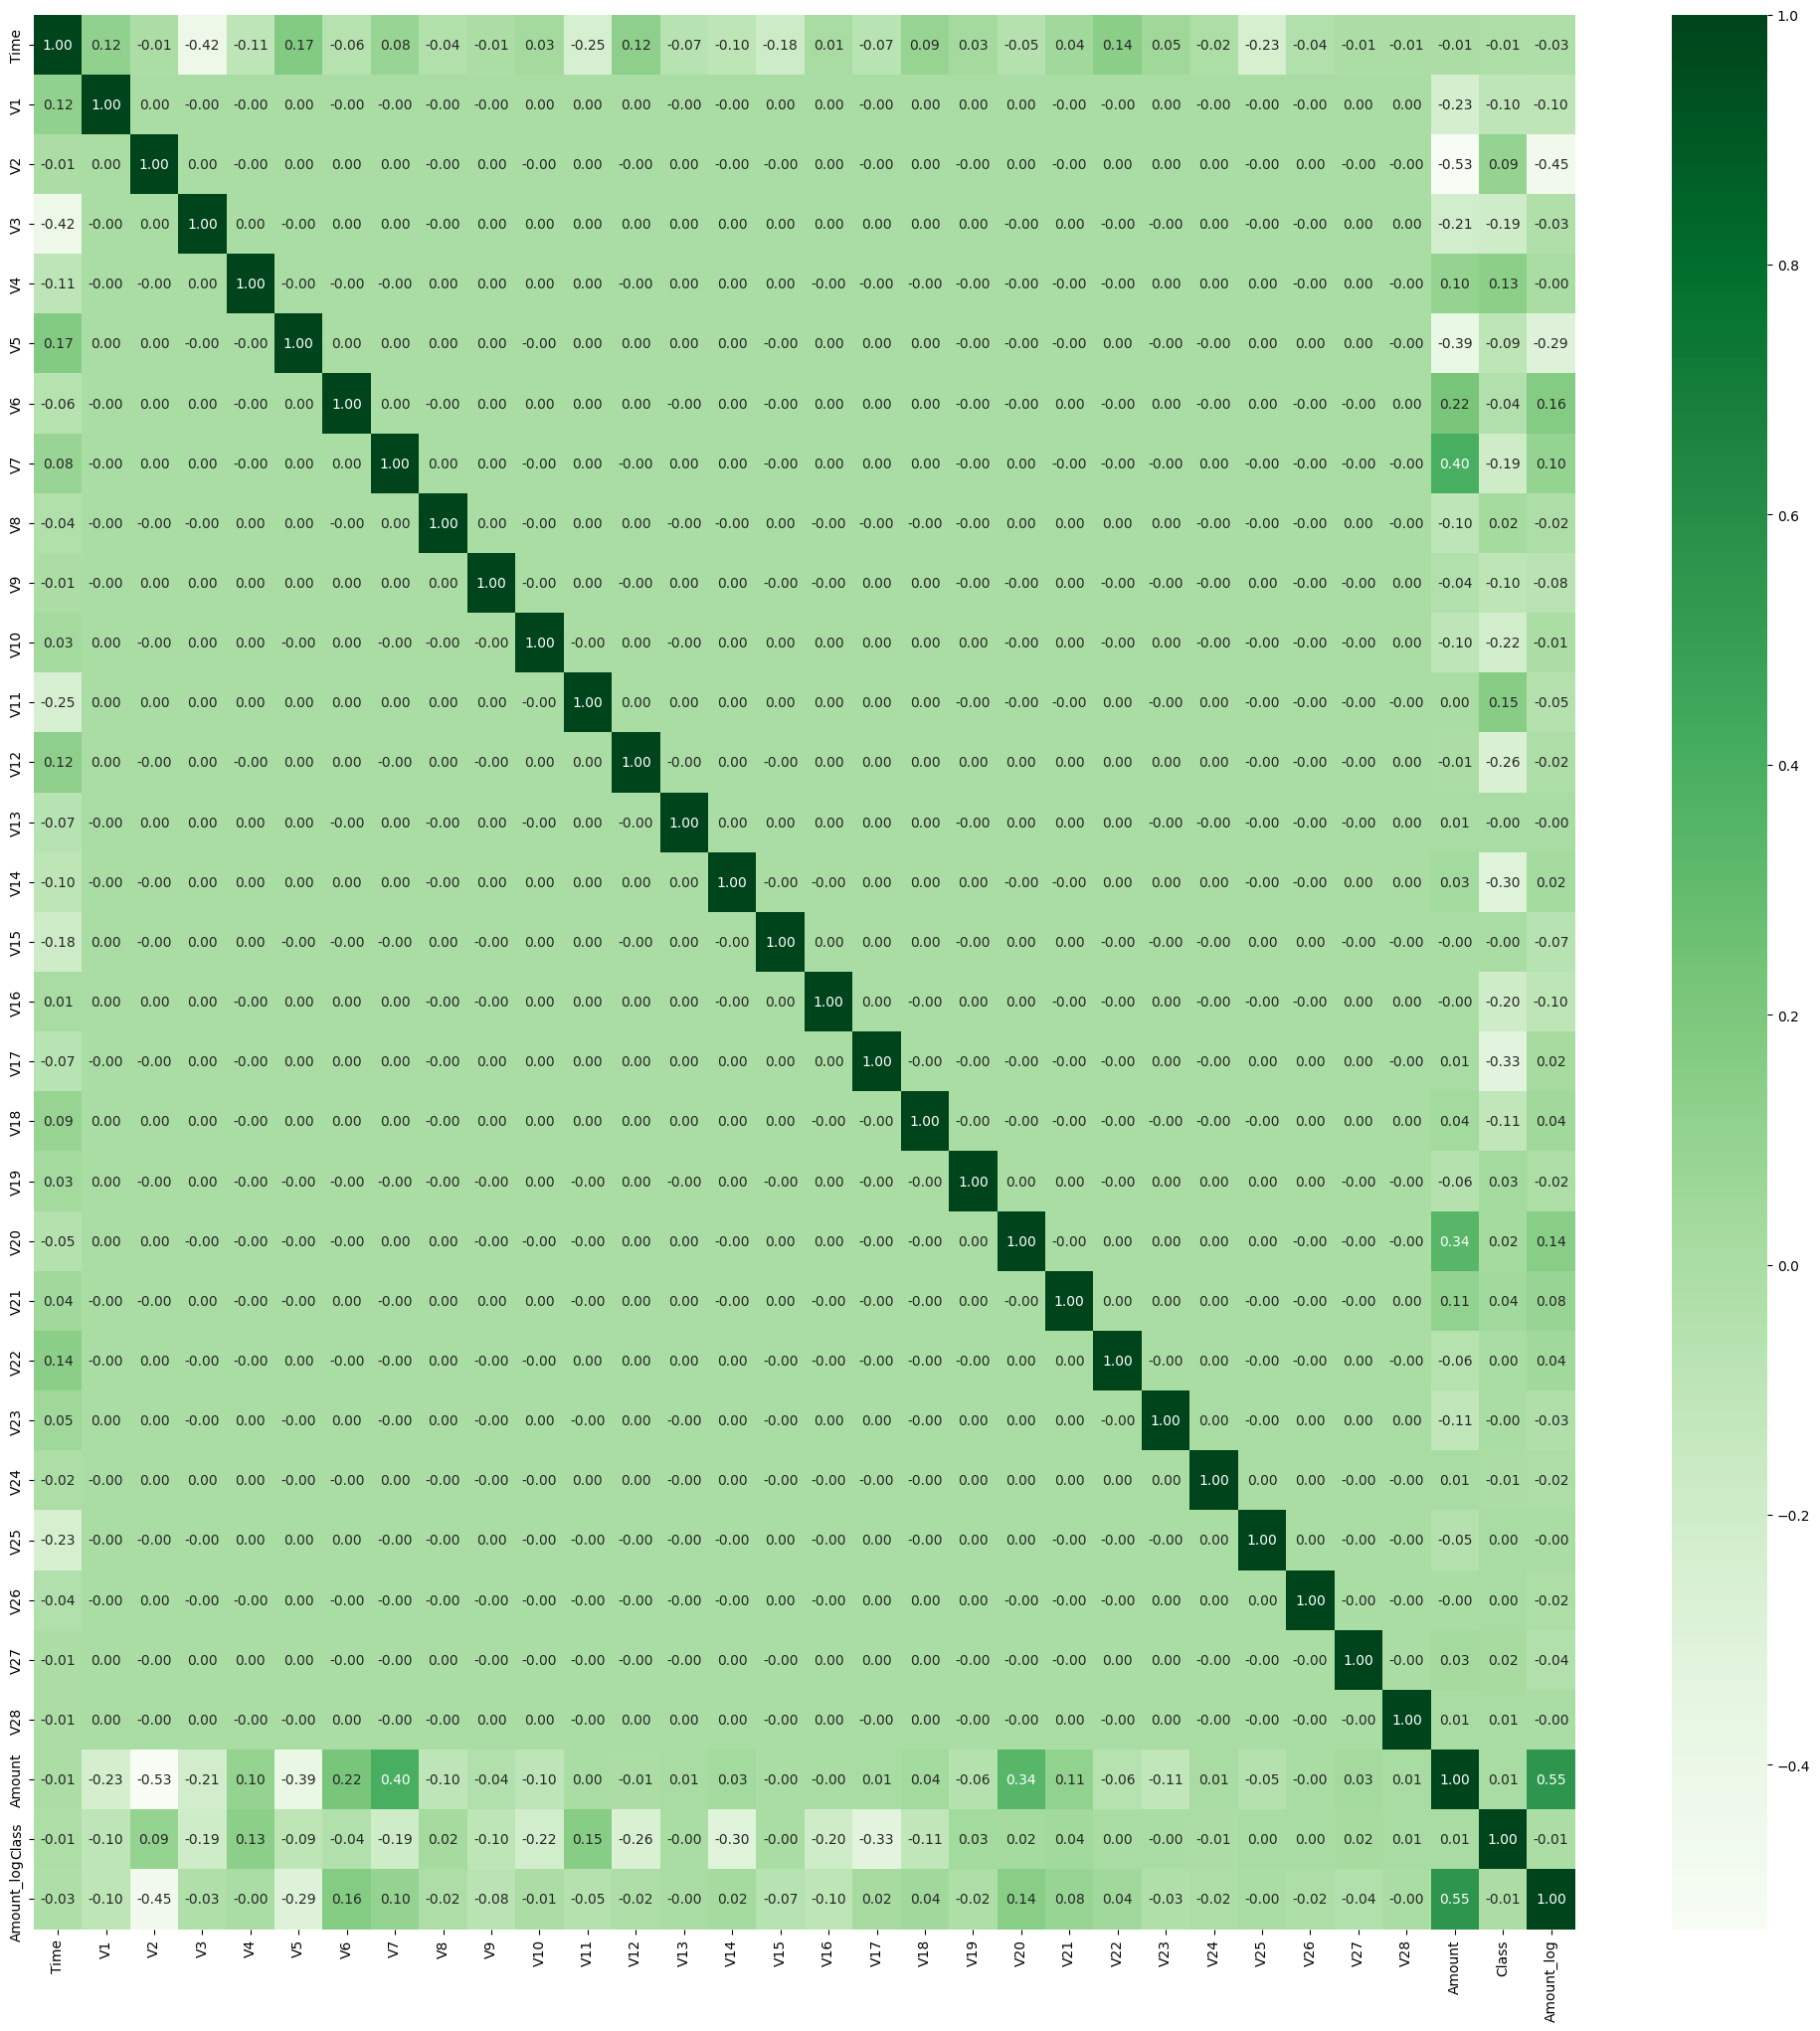

In [31]:
# 코드를 입력해 주세요
plt.figure(figsize = (25, 25))
sns.heatmap(df.corr(), fmt = '.2f', annot=True, cmap='Greens')

<p><strong>[출력 결과]</strong></p><pre><AxesSubplot:></pre>

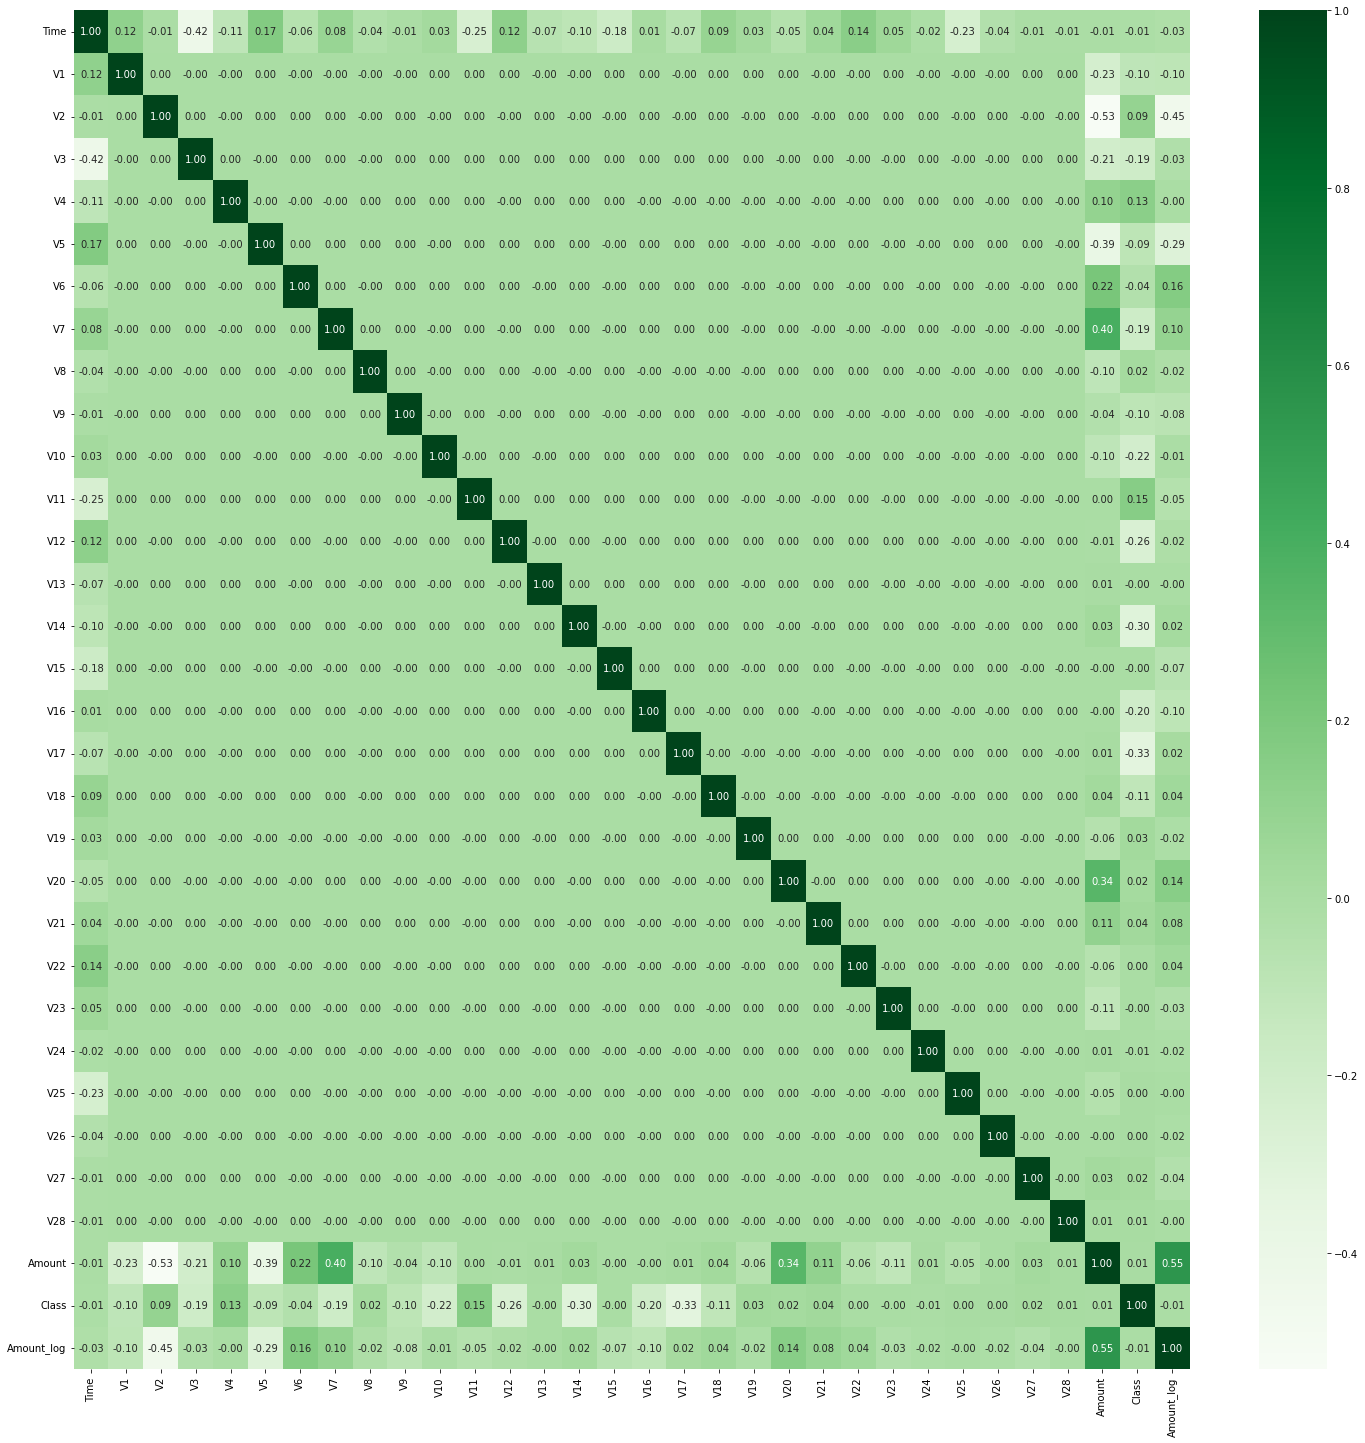

- class 컬럼의 값인 1인 데이터 프레임을 추출 후 상관 관계를 heatmap을 이용하여 시각화 하세요

<p><strong>[출력 결과]</strong></p><pre><Figure size 1800x1800 with 2 Axes></pre>

<AxesSubplot: >

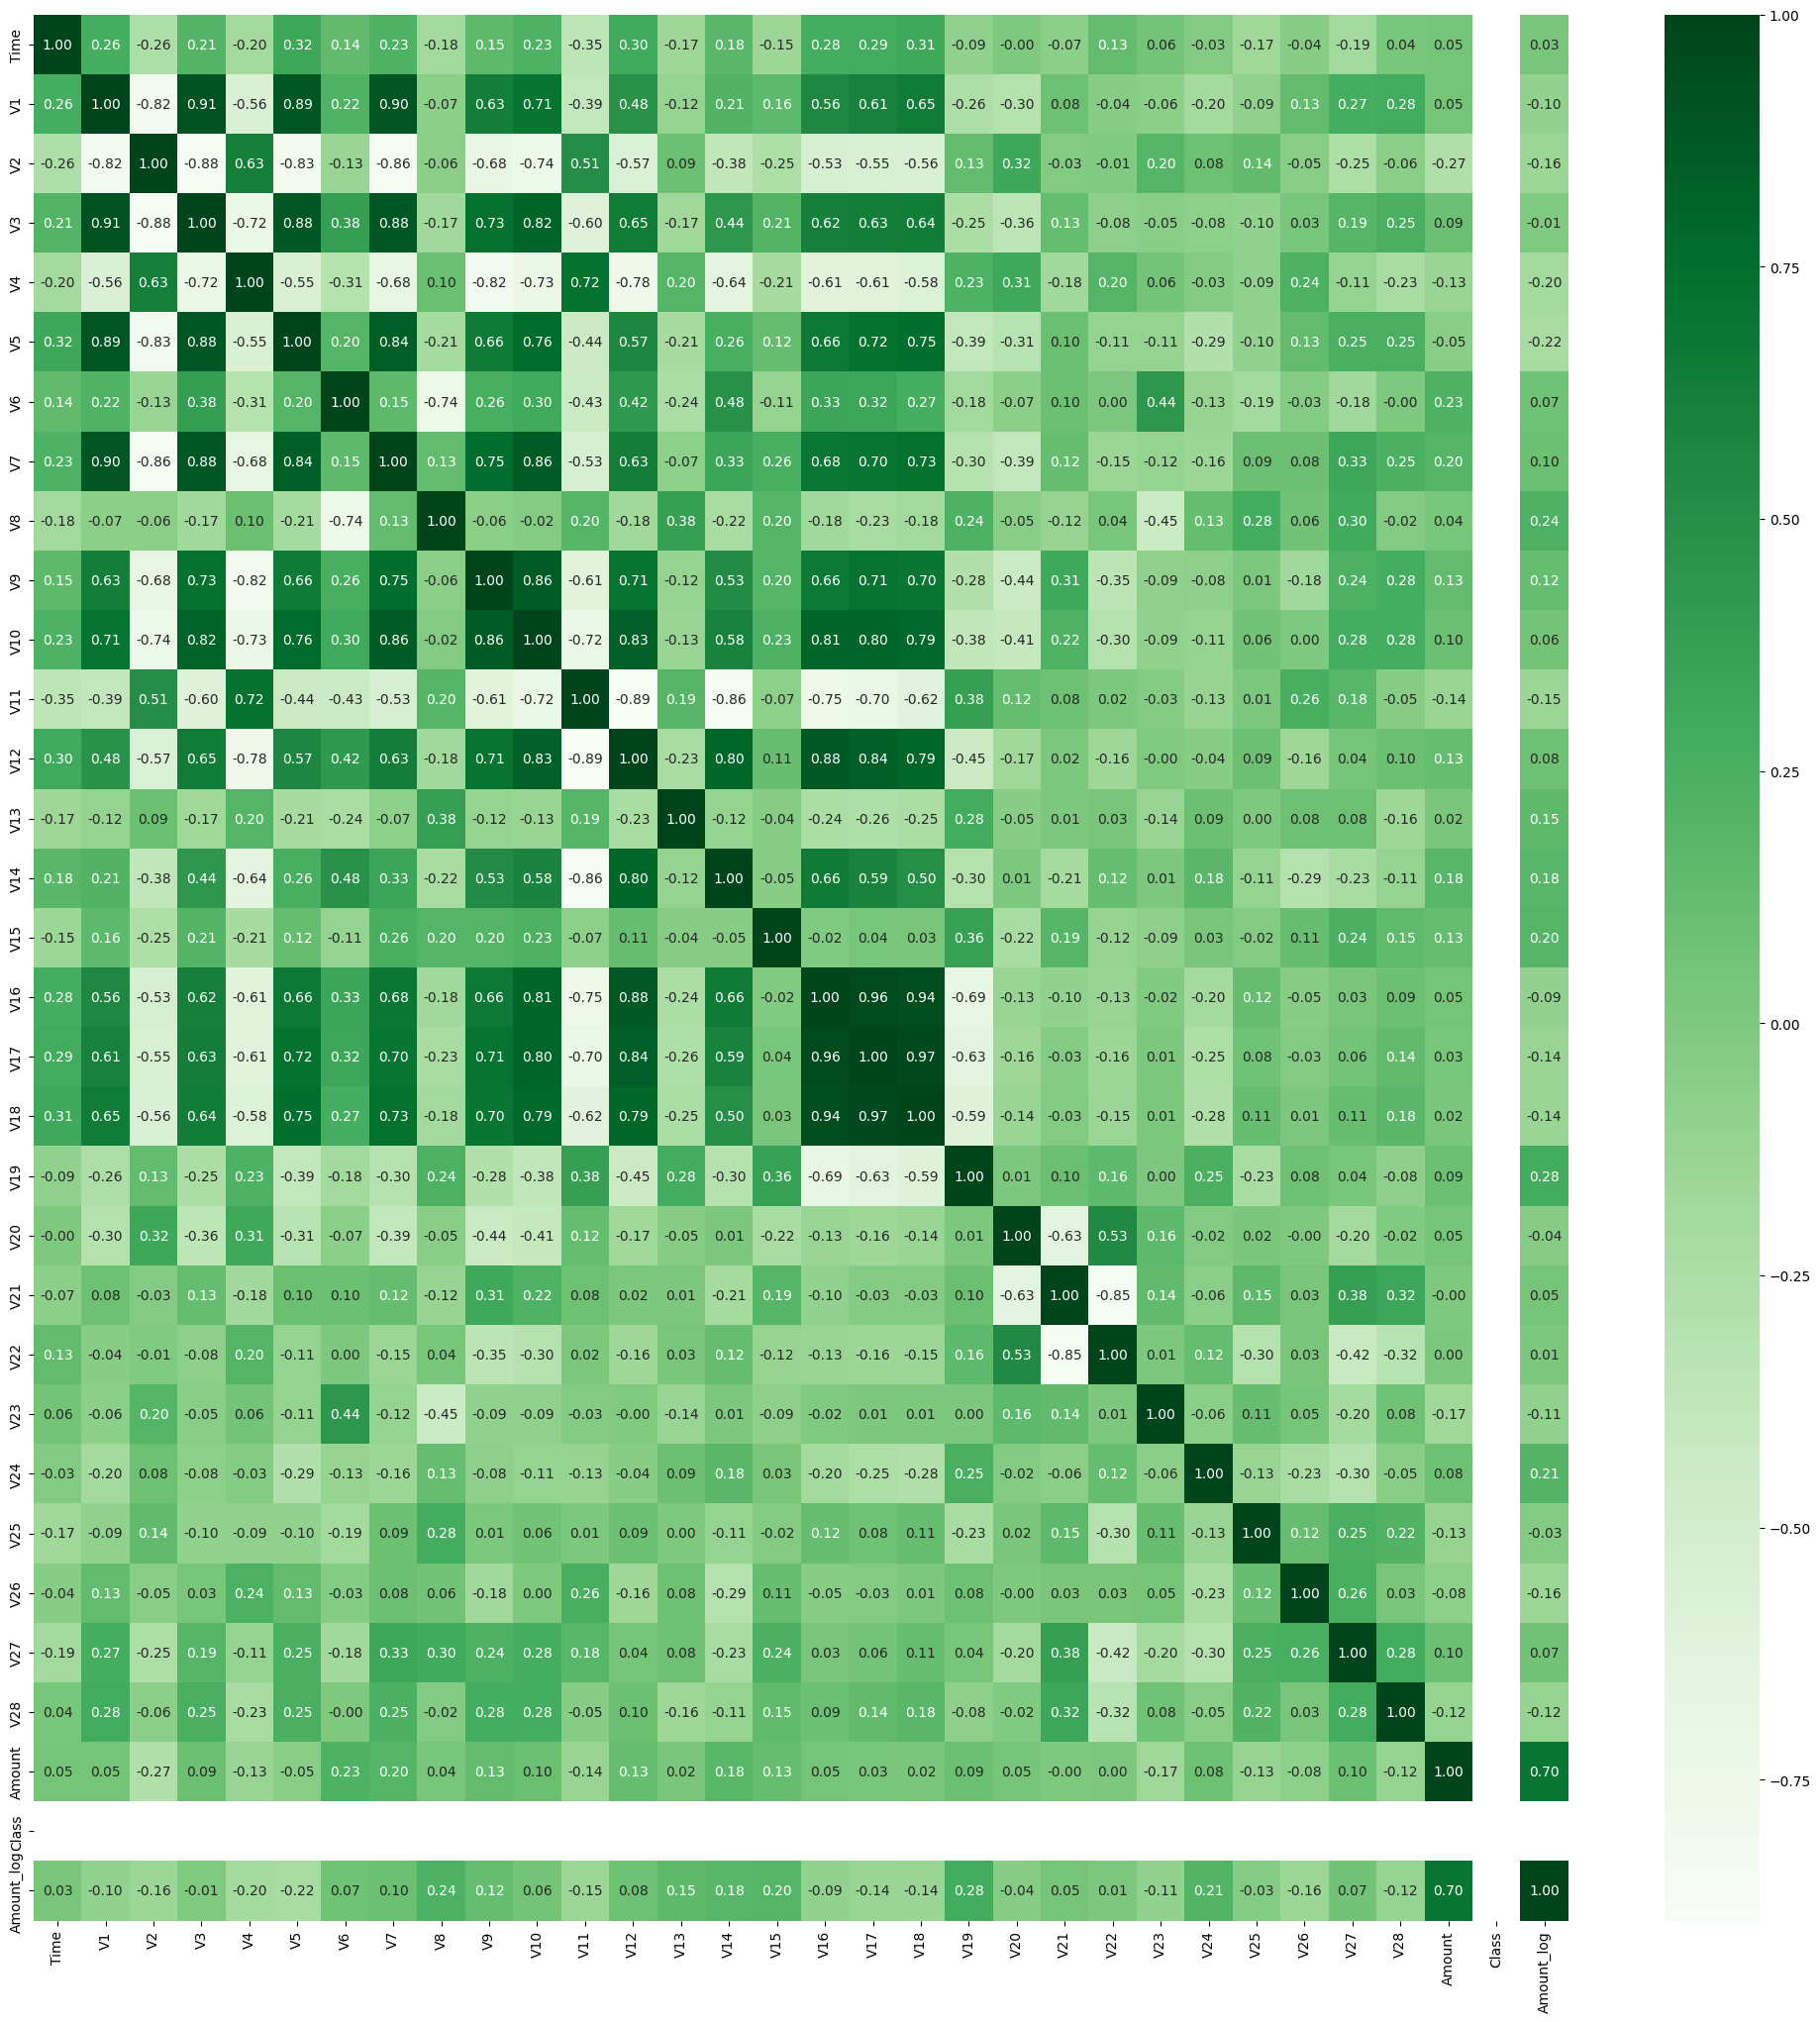

In [32]:
# 코드를 입력해 주세요
plt.figure(figsize = (25, 25))
sns.heatmap(df[df['Class'] == 1].corr(), fmt = '.2f', annot=True, cmap='Greens')

<p><strong>[출력 결과]</strong></p><pre><AxesSubplot:></pre>

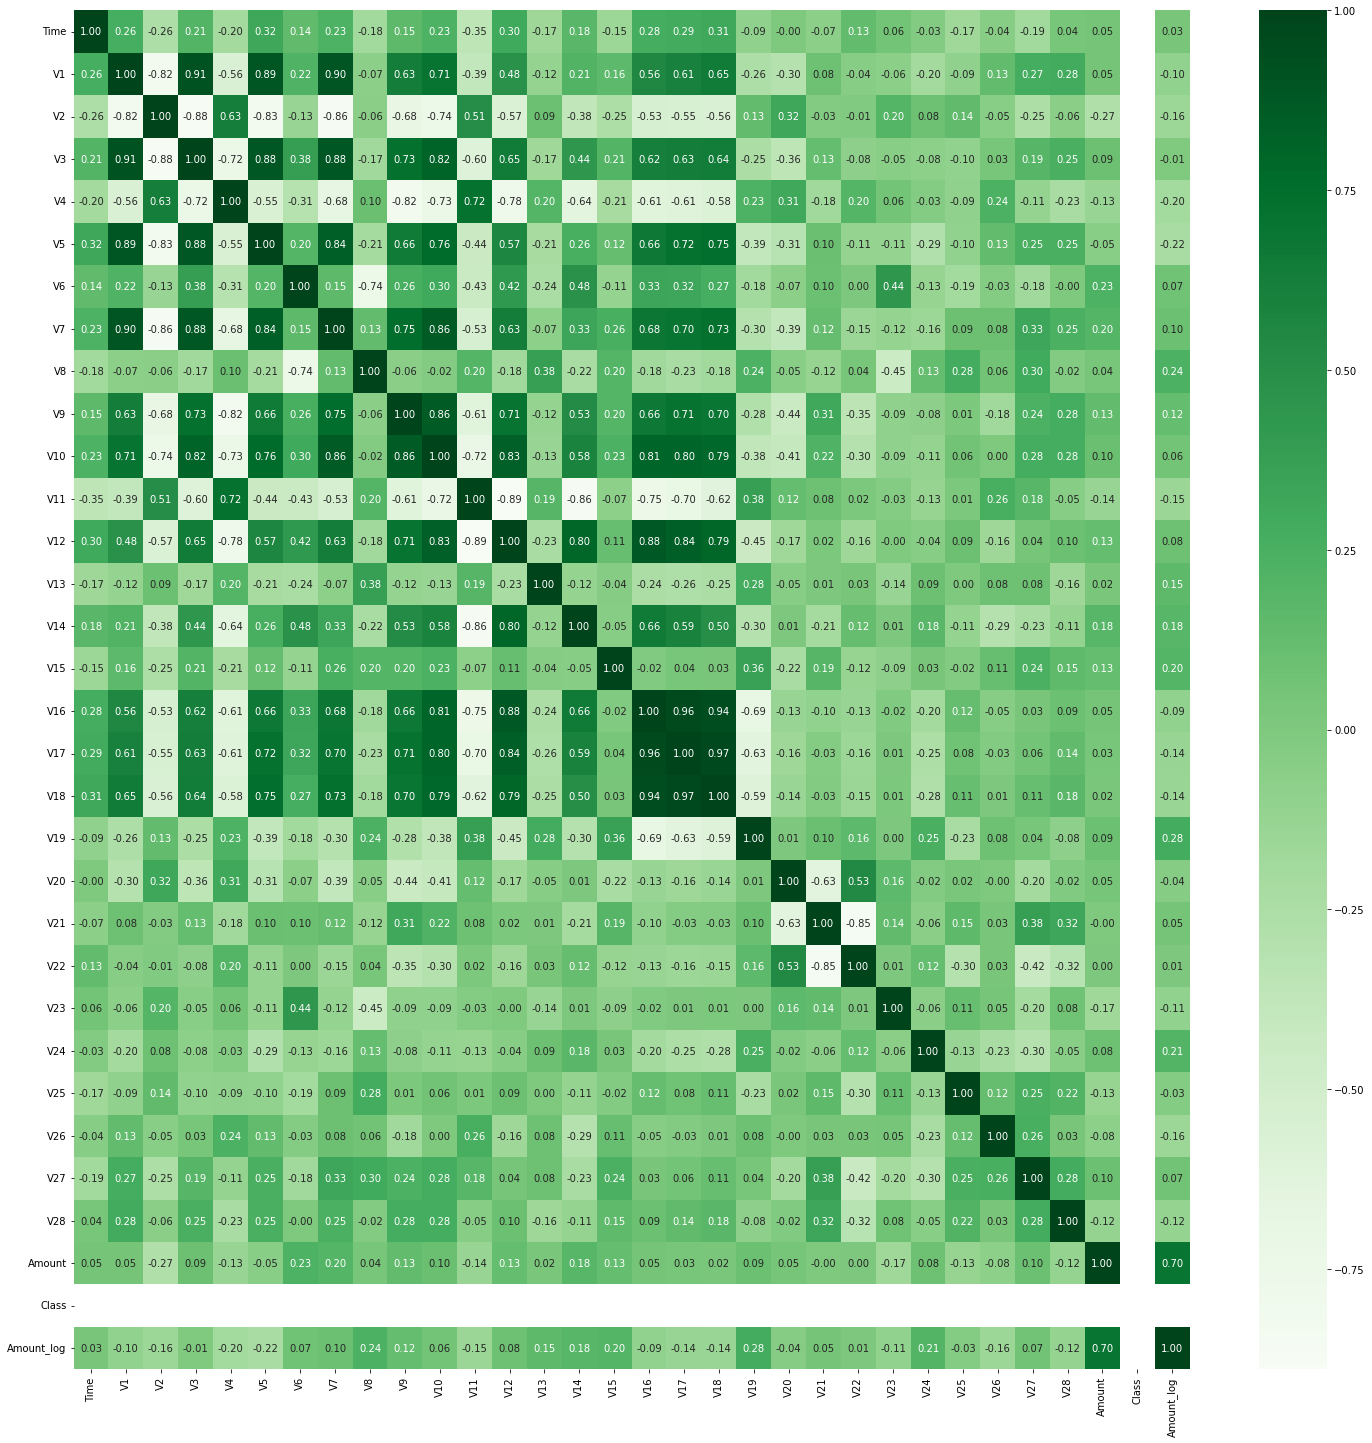

- class 컬럼의 값인 0인 데이터 프레임을 추출 후 상관 관계를 heatmap을 이용하여 시각화 하세요


<p><strong>[출력 결과]</strong></p><pre><Figure size 1800x1800 with 2 Axes></pre>

<AxesSubplot: >

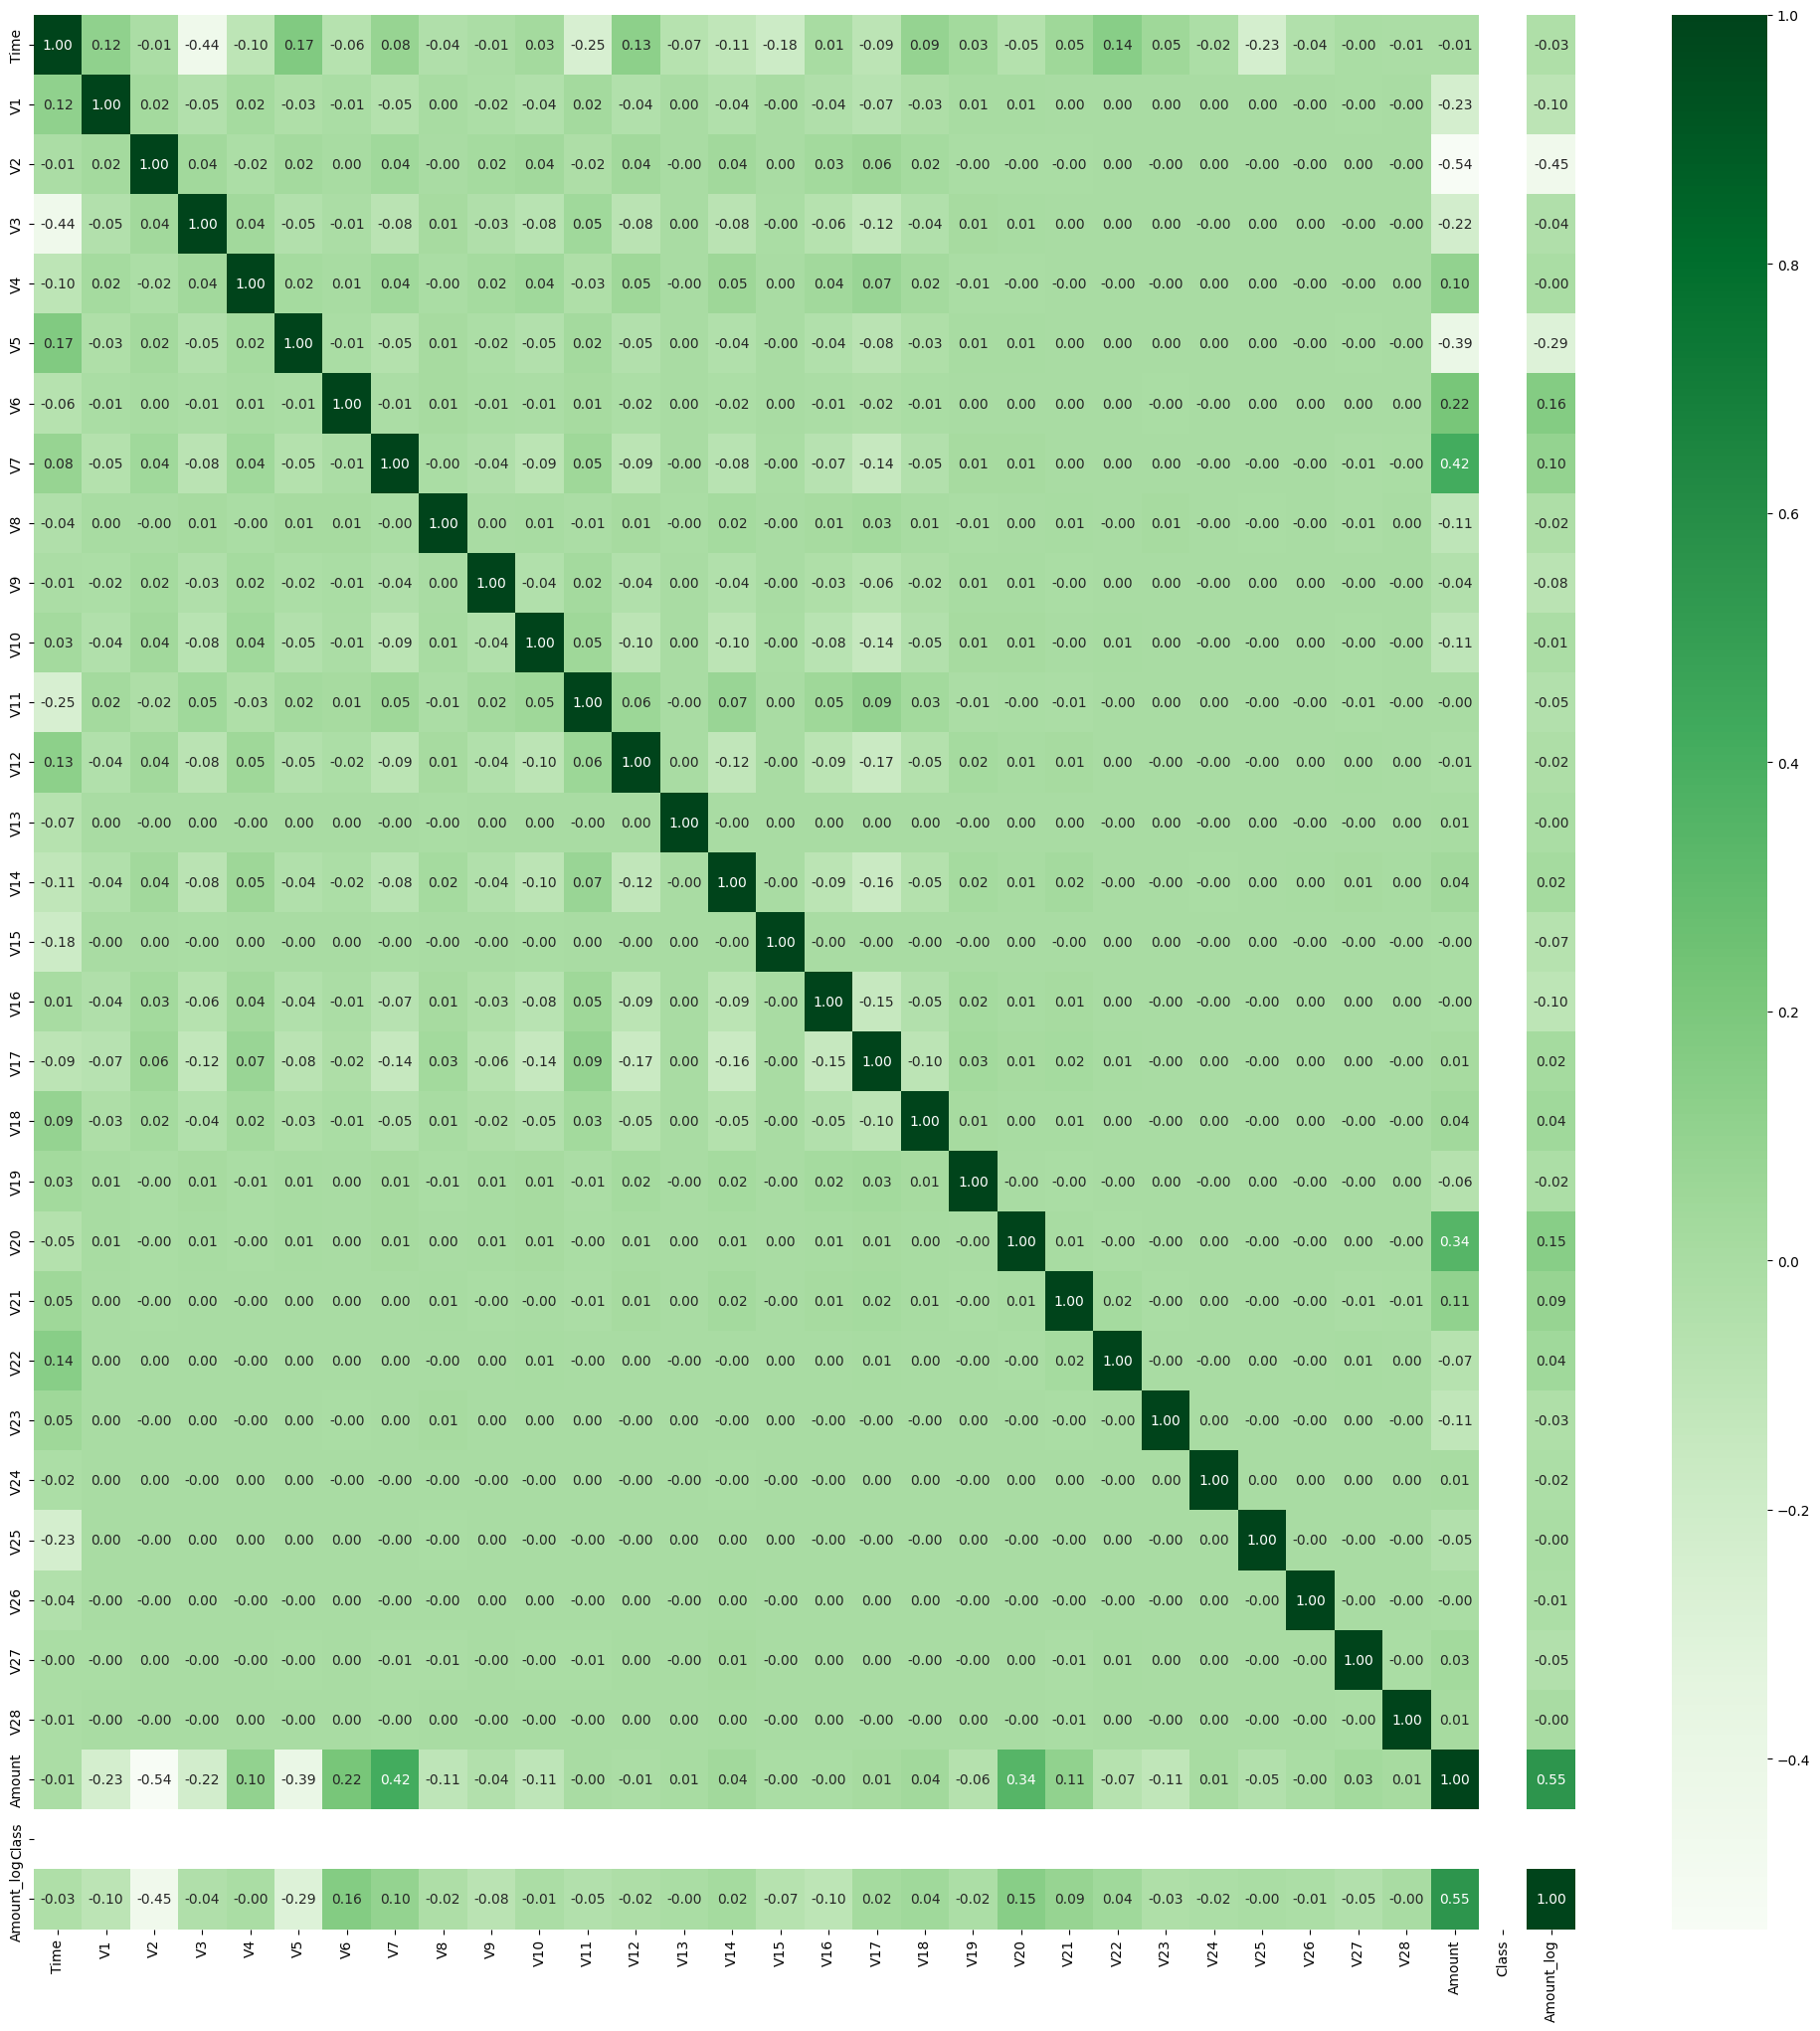

In [33]:
# 코드를 입력해 주세요
plt.figure(figsize = (25, 25))
sns.heatmap(df[df['Class'] == 0].corr(), fmt = '.2f', annot=True, cmap='Greens')

# Class 1인 히트맵에서는 상관관계가 높게 나오는 곳도 있는데 Class 0인 히트맵은 낮게 나옴
# 데이터 개수때문에 발생할 수 있는 문제임

<p><strong>[출력 결과]</strong></p><pre><AxesSubplot:></pre>

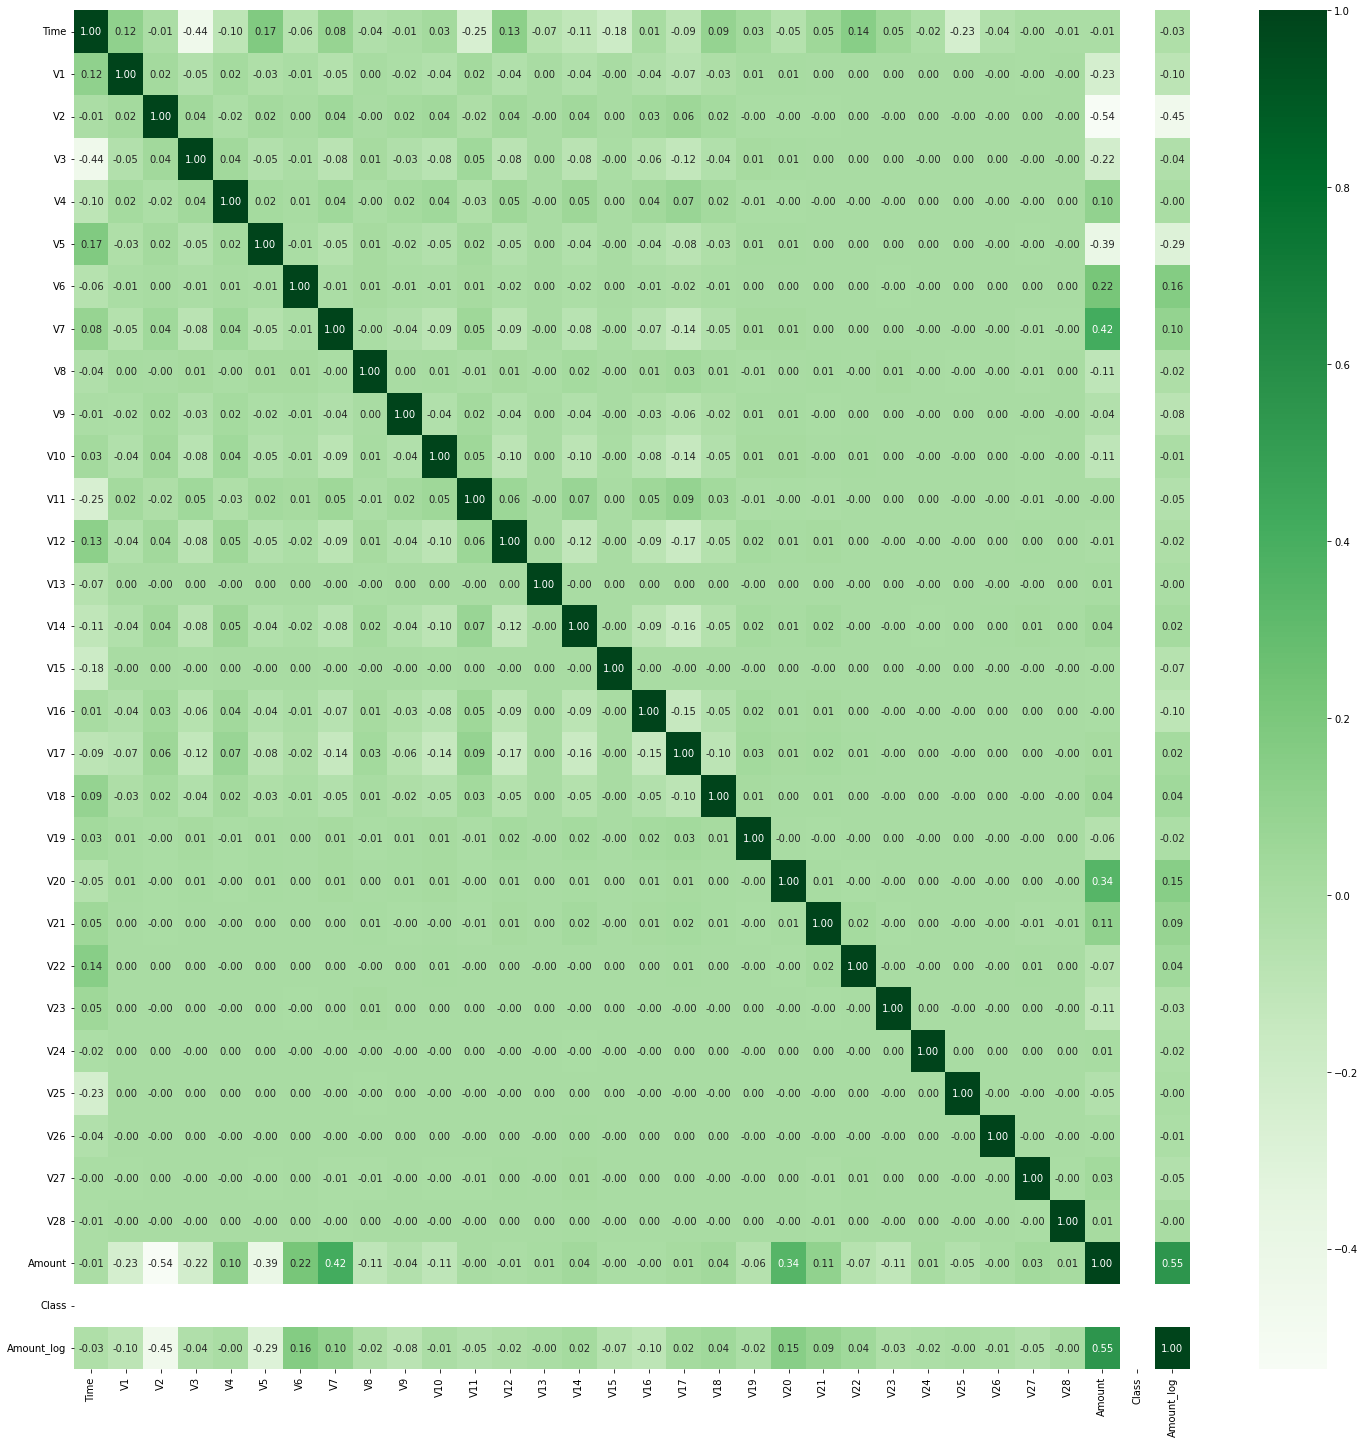

In [34]:
# 학습에 사용할 특성을 선택하세요. (학습에서 제외하기 위해선 주석처리 합니다.)
features = [
     'V1',
     'V2',
     'V3',
     'V4',
     'V5',
     'V6',
     'V7',
     'V8',
     'V9',
     'V10',
     'V11',
     'V12',
     'V13',
     'V14',
     'V15',
     'V16',
     'V17',
     'V18',
     'V19',
     'V20',
     'V21',
     'V22',
     'V23',
     'V24',
     'V25',
     'V26',
     'V27',
     'V28',
     'Amount_log'
]
features

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount_log']

<p><strong>[출력 결과]</strong></p><pre><Figure size 1800x1800 with 2 Axes></pre>

- features에 저장된 컬럼명만 추출하여 X에 대입하세요.

In [36]:
# 코드를 입력해 주세요
X = df[features]
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_log
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.570980
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,3.249987
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,4.232366
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,2.397895


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>V1</th>
      <th>V2</th>
      <th>V3</th>
      <th>V4</th>
      <th>V5</th>
      <th>V6</th>
      <th>V7</th>
      <th>V8</th>
      <th>V9</th>
      <th>V10</th>
      <th>...</th>
      <th>V20</th>
      <th>V21</th>
      <th>V22</th>
      <th>V23</th>
      <th>V24</th>
      <th>V25</th>
      <th>V26</th>
      <th>V27</th>
      <th>V28</th>
      <th>Amount_log</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>-1.359807</td>
      <td>-0.072781</td>
      <td>2.536347</td>
      <td>1.378155</td>
      <td>-0.338321</td>
      <td>0.462388</td>
      <td>0.239599</td>
      <td>0.098698</td>
      <td>0.363787</td>
      <td>0.090794</td>
      <td>...</td>
      <td>0.251412</td>
      <td>-0.018307</td>
      <td>0.277838</td>
      <td>-0.110474</td>
      <td>0.066928</td>
      <td>0.128539</td>
      <td>-0.189115</td>
      <td>0.133558</td>
      <td>-0.021053</td>
      <td>5.014760</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1.191857</td>
      <td>0.266151</td>
      <td>0.166480</td>
      <td>0.448154</td>
      <td>0.060018</td>
      <td>-0.082361</td>
      <td>-0.078803</td>
      <td>0.085102</td>
      <td>-0.255425</td>
      <td>-0.166974</td>
      <td>...</td>
      <td>-0.069083</td>
      <td>-0.225775</td>
      <td>-0.638672</td>
      <td>0.101288</td>
      <td>-0.339846</td>
      <td>0.167170</td>
      <td>0.125895</td>
      <td>-0.008983</td>
      <td>0.014724</td>
      <td>1.305626</td>
    </tr>
    <tr>
      <th>2</th>
      <td>-1.358354</td>
      <td>-1.340163</td>
      <td>1.773209</td>
      <td>0.379780</td>
      <td>-0.503198</td>
      <td>1.800499</td>
      <td>0.791461</td>
      <td>0.247676</td>
      <td>-1.514654</td>
      <td>0.207643</td>
      <td>...</td>
      <td>0.524980</td>
      <td>0.247998</td>
      <td>0.771679</td>
      <td>0.909412</td>
      <td>-0.689281</td>
      <td>-0.327642</td>
      <td>-0.139097</td>
      <td>-0.055353</td>
      <td>-0.059752</td>
      <td>5.939276</td>
    </tr>
    <tr>
      <th>3</th>
      <td>-0.966272</td>
      <td>-0.185226</td>
      <td>1.792993</td>
      <td>-0.863291</td>
      <td>-0.010309</td>
      <td>1.247203</td>
      <td>0.237609</td>
      <td>0.377436</td>
      <td>-1.387024</td>
      <td>-0.054952</td>
      <td>...</td>
      <td>-0.208038</td>
      <td>-0.108300</td>
      <td>0.005274</td>
      <td>-0.190321</td>
      <td>-1.175575</td>
      <td>0.647376</td>
      <td>-0.221929</td>
      <td>0.062723</td>
      <td>0.061458</td>
      <td>4.824306</td>
    </tr>
    <tr>
      <th>4</th>
      <td>-1.158233</td>
      <td>0.877737</td>
      <td>1.548718</td>
      <td>0.403034</td>
      <td>-0.407193</td>
      <td>0.095921</td>
      <td>0.592941</td>
      <td>-0.270533</td>
      <td>0.817739</td>
      <td>0.753074</td>
      <td>...</td>
      <td>0.408542</td>
      <td>-0.009431</td>
      <td>0.798278</td>
      <td>-0.137458</td>
      <td>0.141267</td>
      <td>-0.206010</td>
      <td>0.502292</td>
      <td>0.219422</td>
      <td>0.215153</td>
      <td>4.262539</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>284802</th>
      <td>-11.881118</td>
      <td>10.071785</td>
      <td>-9.834783</td>
      <td>-2.066656</td>
      <td>-5.364473</td>
      <td>-2.606837</td>
      <td>-4.918215</td>
      <td>7.305334</td>
      <td>1.914428</td>
      <td>4.356170</td>
      <td>...</td>
      <td>1.475829</td>
      <td>0.213454</td>
      <td>0.111864</td>
      <td>1.014480</td>
      <td>-0.509348</td>
      <td>1.436807</td>
      <td>0.250034</td>
      <td>0.943651</td>
      <td>0.823731</td>
      <td>0.570980</td>
    </tr>
    <tr>
      <th>284803</th>
      <td>-0.732789</td>
      <td>-0.055080</td>
      <td>2.035030</td>
      <td>-0.738589</td>
      <td>0.868229</td>
      <td>1.058415</td>
      <td>0.024330</td>
      <td>0.294869</td>
      <td>0.584800</td>
      <td>-0.975926</td>
      <td>...</td>
      <td>0.059616</td>
      <td>0.214205</td>
      <td>0.924384</td>
      <td>0.012463</td>
      <td>-1.016226</td>
      <td>-0.606624</td>
      <td>-0.395255</td>
      <td>0.068472</td>
      <td>-0.053527</td>
      <td>3.249987</td>
    </tr>
    <tr>
      <th>284804</th>
      <td>1.919565</td>
      <td>-0.301254</td>
      <td>-3.249640</td>
      <td>-0.557828</td>
      <td>2.630515</td>
      <td>3.031260</td>
      <td>-0.296827</td>
      <td>0.708417</td>
      <td>0.432454</td>
      <td>-0.484782</td>
      <td>...</td>
      <td>0.001396</td>
      <td>0.232045</td>
      <td>0.578229</td>
      <td>-0.037501</td>
      <td>0.640134</td>
      <td>0.265745</td>
      <td>-0.087371</td>
      <td>0.004455</td>
      <td>-0.026561</td>
      <td>4.232366</td>
    </tr>
    <tr>
      <th>284805</th>
      <td>-0.240440</td>
      <td>0.530483</td>
      <td>0.702510</td>
      <td>0.689799</td>
      <td>-0.377961</td>
      <td>0.623708</td>
      <td>-0.686180</td>
      <td>0.679145</td>
      <td>0.392087</td>
      <td>-0.399126</td>
      <td>...</td>
      <td>0.127434</td>
      <td>0.265245</td>
      <td>0.800049</td>
      <td>-0.163298</td>
      <td>0.123205</td>
      <td>-0.569159</td>
      <td>0.546668</td>
      <td>0.108821</td>
      <td>0.104533</td>
      <td>2.397895</td>
    </tr>
    <tr>
      <th>284806</th>
      <td>-0.533413</td>
      <td>-0.189733</td>
      <td>0.703337</td>
      <td>-0.506271</td>
      <td>-0.012546</td>
      <td>-0.649617</td>
      <td>1.577006</td>
      <td>-0.414650</td>
      <td>0.486180</td>
      <td>-0.915427</td>
      <td>...</td>
      <td>0.382948</td>
      <td>0.261057</td>
      <td>0.643078</td>
      <td>0.376777</td>
      <td>0.008797</td>
      <td>-0.473649</td>
      <td>-0.818267</td>
      <td>-0.002415</td>
      <td>0.013649</td>
      <td>5.384495</td>
    </tr>
  </tbody>
</table>
<p>284807 rows × 29 columns</p>
</div>

- Class 컬럼을 추출하여 Y에 대입하세요

In [37]:
# 코드를 입력해 주세요
Y = df['Class']
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64</pre>

- 추출된 X데이터를 RobustSclaer를 이용하여 정규화하세요.

In [39]:
# 코드를 입력해 주세요
# 이상치가 많이 존재했기 때문에 RobustScaler를 통해 안정화
# IQR, Median을 이용해 Scaling함.
# MinMaxScaler - 최대최소
# StandardScaler - 평균값
# 위 두 Scaler는 이상치에 영향을 받지만 RobustScaler는 영향을 받지 않음
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_Scaled = scaler.fit_transform(X)
X_Scaled

array([[-0.61623732, -0.09860181,  1.22890545, ...,  0.81673112,
        -0.24609073,  0.76029701],
       [ 0.52492862,  0.14309984, -0.00697044, ..., -0.0637815 ,
         0.02651893, -0.74031194],
       [-0.61558747, -1.0024067 ,  0.83093237, ..., -0.35021814,
        -0.54096166,  1.13432963],
       ...,
       [ 0.85037719, -0.26153195, -1.78846319, ...,  0.01922743,
        -0.28805801,  0.44376276],
       [-0.1156293 ,  0.33160212,  0.27256711, ...,  0.66392082,
         0.71082878, -0.29841135],
       [-0.24665367, -0.18200361,  0.27299846, ..., -0.02321069,
         0.01832587,  0.90988115]])

<p><strong>[출력 결과]</strong></p><pre>array([[-0.61623732, -0.09860181,  1.22890545, ...,  0.81673112,
        -0.24609073,  0.76029701],
       [ 0.52492862,  0.14309984, -0.00697044, ..., -0.0637815 ,
         0.02651893, -0.74031194],
       [-0.61558747, -1.0024067 ,  0.83093237, ..., -0.35021814,
        -0.54096166,  1.13432963],
       ...,
       [ 0.85037719, -0.26153195, -1.78846319, ...,  0.01922743,
        -0.28805801,  0.44376276],
       [-0.1156293 ,  0.33160212,  0.27256711, ...,  0.66392082,
         0.71082878, -0.29841135],
       [-0.24665367, -0.18200361,  0.27299846, ..., -0.02321069,
         0.01832587,  0.90988115]])</pre>

- X_Sclaed와 Y를 이용하여 데이터를 분할하세요. 
    - 층화추출을 적용하세요(범주가 불균형해서), random_state는 0으로 지정하세요.

In [42]:
# 코드를 입력해 주세요
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_Scaled, Y, stratify = Y, random_state = 0)

- DecisionTree 모델을 적용 후 성능을 평가하세요. 

In [44]:
# 코드를 입력해 주세요
# 불균형한 데이터를 사용하면 정확도 지표는 잘못 해석될 수 있음
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.9992415943372377)

<p><strong>[출력 결과]</strong></p><pre>(1.0, 0.999283727985169)</pre>

- 범주의 비율이 비대칭인 경우 정확도는 높게 나올 수 있습니다. 
- 정확한 성능 평가를 위해 classification_report 함수를 이용해서 test 데이터를 평가하세요.


In [46]:
# 코드를 입력해 주세요
from sklearn.metrics import classification_report
p_test = model.predict(x_test)
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.79      0.77      0.78       123

    accuracy                           1.00     71202
   macro avg       0.89      0.89      0.89     71202
weighted avg       1.00      1.00      1.00     71202



<p><strong>[출력 결과]</strong></p><pre>              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.81      0.76      0.79       123

    accuracy                           1.00     71202
   macro avg       0.90      0.88      0.89     71202
weighted avg       1.00      1.00      1.00     71202

</pre>

- 특성 중요도를 시각화 하세요.
     - 특성 중요도가 0인 경우 제외하세요.
     - 상위 10개만 시각화하세요.

<AxesSubplot: >

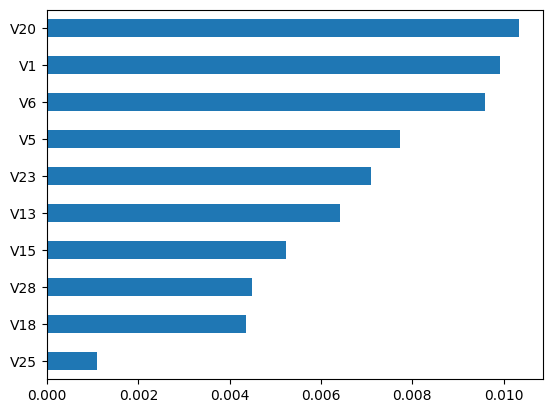

In [48]:
# 코드를 입력해 주세요
fi = pd.Series(model.feature_importances_, index=X.columns)
fi[fi != 0].sort_values().head(10).plot(kind = 'barh')

<p><strong>[출력 결과]</strong></p><pre><AxesSubplot:></pre>

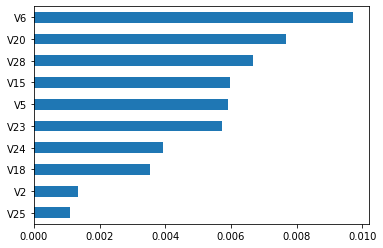

<p><strong>[출력 결과]</strong></p><pre><Figure size 432x288 with 1 Axes></pre>

## 제출

제출을 위해 본 연습문제의 데이터 전처리 및 Decision Tree 모델 학습 과정을 다시 수행한 이후 학습 데이터의 score와 테스트 데이터의 score를 아래와 같은 dictionary로 만들어 `result`에 저장하세요.
- `{"train": 0.123, "test": 0.456}`
- 구체적으로 다음 과정을 수행합니다.
    1. 데이터 로드하기
    2. `Amount` 컬럼에 `np.log1p` 함수를 적용하여 새로운 컬럼 `Amount_log` 생성하기
    3. 아래 `features`만 추출하여 `X`에 저장하고, `Class` 컬럼을 `Y`에 저장
    ```python
    features = [
        'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount_log'
    ]
    ```
    4. `X`에 Robust Scaler 적용하기
    5. 학습 데이터와 테스트 데이터로 분리하기.
        - 테스트 데이터를 전체의 **25%로** 합니다.
        - **분리할 때 반드시 `stratify`를 적용합니다.**
        - **분리할 때 반드시 `random_state=SEED`를 추가합니다.** 이를 추가하지 않으면 제대로 채점되지 않습니다.
    6. Decision Tree 분류 모델 학습하기: 모델 생성할 때 **반드시 `random_state=SEED`을 지정합니다.**
    7. 학습 데이터와 테스트 데이터의 score 제출

In [52]:
# SEED 값 바꾸면 제대로 채점되지 않을 수 있습니다.
SEED = 2023

df = pd.read_csv("/mnt/elice/dataset/creditcard.csv")
df['Amount_log'] = np.log1p(df['Amount'])

features = [
 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount_log'
]

X = df[features]
Y = df['Class']

X_Scaled = RobustScaler().fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_Scaled, Y, stratify = Y, random_state = SEED, test_size = 0.25)

model = DecisionTreeClassifier(random_state = SEED).fit(x_train, y_train)


# TODO: 본 연습문제의 전 과정을 다시 수행하세요.
result = {
    "train": model.score(x_train, y_train),
    "test": model.score(x_test, y_test),
}

## 채점 수행

아래 코드는 채점 수행을 위한 코드입니다.

따라서 이를 수정했을시 **채점이 제대로 이루어지지 않습니다.**

**주의**: 채점 코드를 실행하기 전에 반드시 코드 파일을 한번 저장하시길 바랍니다.

In [53]:
import os
import json

assert isinstance(result, dict), \
    "'result' 변수에 요구사항에 맞는 dictionary가 저장되어 있는지 확인하세요."

with open('result.json', 'w') as f:
    json.dump(result, f)

os.system('elice_grade result.json cds_ai_exercise.ipynb')

send files ['result.json', 'cds_ai_exercise.ipynb'] for grade...
waiting result...
waiting result...
done!

Score: 100.000000
Duration: 1.737 seconds
=== Message ===
제출 완료되었습니다.


0